# Title of notebook

Brief 1-2 sentence description of notebook.

In [1]:
import random

In [2]:
# Imports of all used packages and libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

# importing random forest classifier from assemble module 
from sklearn.ensemble import RandomForestClassifier 


## Inputs & Data

Explanation of each input and where it comes from.

In [7]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc" # where data is saved should always be shown in the inputs

In [8]:
font = {'weight' : 'medium',
        'size'   : 20}

matplotlib.rc('font', **font)

In [9]:
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [10]:
BAND_TO_COLOR = {"theta": "#FFAF00", "beta": "blue", "gamma": "#15616F"}
["#FFAF00", "#15616F"]

['#FFAF00', '#15616F']

In [11]:
OUTCOME_TO_COLOR = {'lose': "#951a1d",
 'omission': "#af780d",
 'rewarded': "#0499af",
 'win': "#3853a3",
'lose_comp': "#951a1d",
 'win_comp': "#3853a3",
'lose_non_comp': "#e67073",
 'win_non_comp': "#93a5da"}

In [12]:
MEASURE_TO_PATTERN = {"granger": "o", "coherence": "x", "power": ""}

In [13]:
GROUPING = "trial_outcome"
# GROUPING = "competition_closeness"

In [14]:
OUTCOME_LABELS = ["win", "lose", "rewarded"]
# OUTCOME_LABELS = ['win_non_comp', 'lose_non_comp', 'lose_comp', 'win_comp', 'rewarded']
# OUTCOME_LABELS = ['win_non_comp', 'lose_non_comp', 'lose_comp', 'win_comp']

# OUTCOME_LABELS = ['lose_non_comp', 'win_comp']

In [15]:
granger_df = pd.read_pickle("./proc/per_trial_granger.pkl")

In [16]:
power_df = pd.read_pickle("./proc/rce_sleap_and_power.pkl")

In [17]:
coherence_df = pd.read_pickle("./proc/rce_sleap_and_coherence.pkl")

In [18]:
granger_df.shape

(278, 126)

In [19]:
coherence_df.shape

(275, 128)

In [20]:
power_df.shape

(278, 161)

In [21]:
ALL_BANDS = ["theta", "beta", "gamma"]
BAND_TO_FREQ = {"theta": {"low_freq": 6, "high_freq": 11}, "beta": {"low_freq": 20, "high_freq": 31}, "gamma": {"low_freq": 30, "high_freq": 51}}
BAND_TO_FREQ = {"theta": (6,11), "beta": (20,31), "gamma": (30,51)}


In [22]:
merge_columns = ["time", "recording_file", "current_subject", "video_number"]
# Find columns in df2 that are not in merge_columns and also exist in df1, then drop them from df2
cols_to_drop = [col for col in power_df.columns if col not in merge_columns and col in coherence_df.columns]
coherence_df = coherence_df.drop(columns=cols_to_drop)
cols_to_drop = [col for col in power_df.columns if col not in merge_columns and col in granger_df.columns]
granger_df = granger_df.drop(columns=cols_to_drop)


In [23]:
power_df.columns

Index(['time', 'recording_file', 'video_number', 'current_subject',
       'mPFC_baseline_lfp_trace', 'mPFC_trial_lfp_trace',
       'mPFC_baseline-trial_lfp_trace', 'vHPC_baseline_lfp_trace',
       'vHPC_trial_lfp_trace', 'vHPC_baseline-trial_lfp_trace',
       ...
       'mPFC_baseline_power_window-averaged-velocity-parsed',
       'vHPC_baseline_power_window-averaged-velocity-parsed',
       'BLA_baseline_power_window-averaged-velocity-parsed',
       'LH_baseline_power_window-averaged-velocity-parsed',
       'MD_baseline_power_window-averaged-velocity-parsed',
       'mPFC_trial_power_window-averaged-velocity-parsed',
       'vHPC_trial_power_window-averaged-velocity-parsed',
       'BLA_trial_power_window-averaged-velocity-parsed',
       'LH_trial_power_window-averaged-velocity-parsed',
       'MD_trial_power_window-averaged-velocity-parsed'],
      dtype='object', length=161)

In [24]:
power_col = [col for col in power_df.columns if "power_window-averaged-velocity-parsed" in col]

In [25]:
power_df = power_df.dropna(subset=power_col).reset_index(drop=True)

In [26]:
for col in power_col:
    region_1 = col.split("_")[0]
    
    for band, (low_freq, high_freq) in BAND_TO_FREQ.items():
        region_band_column = "{}_{}_band_power".format(region_1, band)
        power_df[region_band_column] = power_df[col].apply(lambda x: np.mean(x[low_freq: high_freq]))

In [27]:
granger_col = [col for col in granger_df.columns if "window_mean_granger" in col]

In [28]:
BAND_TO_FREQ

{'theta': (6, 11), 'beta': (20, 31), 'gamma': (30, 51)}

In [29]:
for col in granger_col:
    region_1 = col.split("_")[0]
    region_2 = col.split("_")[1]
    
    for band, (low_freq, high_freq) in BAND_TO_FREQ.items():
        region_band_column = "{}_{}_{}_band_granger".format(region_1, region_2, band)
        granger_df[region_band_column] = granger_df[col].apply(lambda x: np.mean(x[low_freq: high_freq]))

/tmp/ipykernel_3586693/202851467.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  granger_df[region_band_column] = granger_df[col].apply(lambda x: np.mean(x[low_freq: high_freq]))
/tmp/ipykernel_3586693/202851467.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  granger_df[region_band_column] = granger_df[col].apply(lambda x: np.mean(x[low_freq: high_freq]))
/tmp/ipykernel_3586693/202851467.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

In [30]:
MERGED_LFP_AND_SLEAP = pd.merge(left=power_df, right=coherence_df, on=merge_columns, how="inner")

In [31]:
MERGED_LFP_AND_SLEAP = pd.merge(left=MERGED_LFP_AND_SLEAP, right=granger_df, on=merge_columns, how="inner")

In [32]:
MERGED_LFP_AND_SLEAP

,time,recording_file,video_number,current_subject,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,mPFC_baseline-trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,vHPC_baseline-trial_lfp_trace,...,MD_vHPC_gamma_band_granger,vHPC_MD_theta_band_granger,vHPC_MD_beta_band_granger,vHPC_MD_gamma_band_granger,mPFC_vHPC_theta_band_granger,mPFC_vHPC_beta_band_granger,mPFC_vHPC_gamma_band_granger,vHPC_mPFC_theta_band_granger,vHPC_mPFC_beta_band_granger,vHPC_mPFC_gamma_band_granger
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.3134648, -0.39993784, -0.8777014, -1.44193...","[0.50154364, 0.29617018, 0.22050627, 0.1145767...","[-0.3134648, -0.39993784, -0.8777014, -1.44193...","[0.2583401, -0.26769176, -0.8311303, -1.046219...","[-1.1479185, -1.1806493, -1.1432426, -1.139735...","[0.2583401, -0.26769176, -0.8311303, -1.046219...",...,0.308700,0.544461,0.315053,0.392972,0.241112,0.322984,0.305378,0.488346,0.492734,0.384876
1,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...","[0.31995025, 0.16429879, 0.010809131, 0.067016...","[1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...","[1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...","[-1.0205019, -0.9152954, -0.9947847, -0.976081...","[1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...",...,0.296993,0.424742,0.464322,0.484576,0.337904,0.300037,0.328714,0.486609,0.406057,0.452749
2,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.22482991, 0.3567013, 0.12538591, -0.136195...","[-0.13835686, 0.42804158, 0.5945022, 0.3134648...","[-0.22482991, 0.3567013, 0.12538591, -0.136195...","[-1.0017985, -0.70955855, -0.7002069, -0.68033...","[0.47109076, 0.34016728, 0.18352668, 0.174175,...","[-1.0017985, -0.70955855, -0.7002069, -0.68033...",...,0.264659,0.416857,0.538528,0.528551,0.379768,0.296710,0.271932,0.515236,0.571965,0.458858
3,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[0.4864109, 0.18591705, 0.397776, 0.24212453, ...","[-0.32211208, 0.023780087, 0.13835686, -0.1102...","[0.4864109, 0.18591705, 0.397776, 0.24212453, ...","[0.58447987, 0.4675839, 0.21275067, 0.03389983...","[0.15780956, 0.047927346, -0.14728892, -0.3565...","[0.58447987, 0.4675839, 0.21275067, 0.03389983...",...,0.336984,0.406630,0.523946,0.504038,0.235804,0.441383,0.310826,0.403164,0.538562,0.466377
4,37450494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-3.6210587, -2.9530544, -2.4342163, -2.574735...","[-2.9508927, -2.998453, -2.3282866, -2.0104983...","[-3.6210587, -2.9530544, -2.4342163, -2.574735...","[-1.4191171, -1.3793725, -1.1233703, -0.911788...","[-4.0457697, -4.2304654, -3.9113393, -3.448431...","[-1.4191171, -1.3793725, -1.1233703, -0.911788...",...,0.269036,0.535375,0.556873,0.593945,0.419996,0.330796,0.258950,0.467323,0.428740,0.466091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,65281838,20230621_111240_standard_comp_to_omission_D5_s...,1.0,1.4,"[0.25026315, -0.0152599495, 0.03967587, 0.0122...","[-2.2889924, -2.2004848, -1.4741111, -1.010208...","[0.25026315, -0.0152599495, 0.03967587, 0.0122...","[-0.54008055, -0.7600229, -0.74047244, -0.6133...","[-0.8479998, -1.0703859, -0.95063955, -0.75513...","[-0.54008055, -0.7600229, -0.74047244, -0.6133...",...,0.266266,0.299642,0.297781,0.298878,0.370794,0.256748,0.272788,0.367977,0.282358,0.261535
266,66781856,20230621_111240_standard_comp_to_omission_D5_s...,1.0,1.4,"[0.42422658, 0.38760272, 0.28383505, 0.0427278...","[-2.426332, -2.2187965, -1.6297625, -1.0193646...","[0.42422658, 0.38760272, 0.28383505, 0.0427278...","[-0.82844937, -0.7673543, -0.7062592, -0.71359...","[-2.074789, -1.8841724, -1.4002994, -1.0117346...","[-0.82844937, -0.7673543, -0.7062592, -0.71359...",...,0.339557,0.327391,0.343262,0.252074,0.395614,0.231199,0.343809,0.307409,0.337629,0.300374
267,68781880,20230621_111240_standard_comp_to_omission_D5_s...,1.0,1.4,"[0.64702183, 0.027467908, -0

In [33]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP if "band" in col and "beta" not in col]

In [34]:
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.dropna(subset=feature_columns)

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Functions 

In [35]:
def get_region_network(row, columns, low_index=0, high_index=1):
    directed_graph = nx.DiGraph()
    for col in columns:
        region_1 = col.split("_")[0]
        region_2 = col.split("_")[1]
        directed_graph.add_edge(region_1, region_2, weight=np.mean(row[col][low_index:high_index]))
    return directed_graph

# Part 1. Making predictions of winning vs losing based on power

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [36]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names




In [37]:
ALL_BANDS = ["theta", "beta", "gamma"]
# BAND_TO_FREQ = {"theta": {"low_freq": 4, "high_freq": 12}, "beta": {"low_freq": 13, "high_freq": 30}, "gamma": {"low_freq": 30, "high_freq": 70}}
# BAND_TO_FREQ = {"theta": {"low_freq": 6, "high_freq": 11}, "gamma": {"low_freq": 30, "high_freq": 51}}
BAND_TO_FREQ = {"theta": (6, 11), "gamma": (30, 51)}

- Filtering for powers that are from low velocity parts of the trial

In [38]:
MERGED_LFP_AND_SLEAP.head()

,time,recording_file,video_number,current_subject,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,mPFC_baseline-trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,vHPC_baseline-trial_lfp_trace,...,MD_vHPC_gamma_band_granger,vHPC_MD_theta_band_granger,vHPC_MD_beta_band_granger,vHPC_MD_gamma_band_granger,mPFC_vHPC_theta_band_granger,mPFC_vHPC_beta_band_granger,mPFC_vHPC_gamma_band_granger,vHPC_mPFC_theta_band_granger,vHPC_mPFC_beta_band_granger,vHPC_mPFC_gamma_band_granger
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.3134648, -0.39993784, -0.8777014, -1.44193...","[0.50154364, 0.29617018, 0.22050627, 0.1145767...","[-0.3134648, -0.39993784, -0.8777014, -1.44193...","[0.2583401, -0.26769176, -0.8311303, -1.046219...","[-1.1479185, -1.1806493, -1.1432426, -1.139735...","[0.2583401, -0.26769176, -0.8311303, -1.046219...",...,0.308700,0.544461,0.315053,0.392972,0.241112,0.322984,0.305378,0.488346,0.492734,0.384876
1,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...","[0.31995025, 0.16429879, 0.010809131, 0.067016...","[1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...","[1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...","[-1.0205019, -0.9152954, -0.9947847, -0.976081...","[1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...",...,0.296993,0.424742,0.464322,0.484576,0.337904,0.300037,0.328714,0.486609,0.406057,0.452749
2,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.22482991, 0.3567013, 0.12538591, -0.136195...","[-0.13835686, 0.42804158, 0.5945022, 0.3134648...","[-0.22482991, 0.3567013, 0.12538591, -0.136195...","[-1.0017985, -0.70955855, -0.7002069, -0.68033...","[0.47109076, 0.34016728, 0.18352668, 0.174175,...","[-1.0017985, -0.70955855, -0.7002069, -0.68033...",...,0.264659,0.416857,0.538528,0.528551,0.379768,0.296710,0.271932,0.515236,0.571965,0.458858
3,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[0.4864109, 0.18591705, 0.397776, 0.24212453, ...","[-0.32211208, 0.023780087, 0.13835686, -0.1102...","[0.4864109, 0.18591705, 0.397776, 0.24212453, ...","[0.58447987, 0.4675839, 0.21275067, 0.03389983...","[0.15780956, 0.047927346, -0.14728892, -0.3565...","[0.58447987, 0.4675839, 0.21275067, 0.03389983...",...,0.336984,0.406630,0.523946,0.504038,0.235804,0.441383,0.310826,0.403164,0.538562,0.466377
4,37450494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-3.6210587, -2.9530544, -2.4342163, -2.574735...","[-2.9508927, -2.998453, -2.3282866, -2.0104983...","[-3.6210587, -2.9530544, -2.4342163, -2.574735...","[-1.4191171, -1.3793725, -1.1233703, -0.911788...","[-4.0457697, -4.2304654, -3.9113393, -3.448431...","[-1.4191171, -1.3793725, -1.1233703, -0.911788...",...,0.269036,0.535375,0.556873,0.593945,0.419996,0.330796,0.258950,0.467323,0.428740,0.466091


- Filtering out for trials that are win vs loss

In [39]:
network_df = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP[GROUPING].isin(OUTCOME_LABELS)]
# network_df = network_df[network_df["current_subject"].isin(["1.1"])]


In [40]:
network_df.groupby(GROUPING).count()

,time,recording_file,video_number,current_subject,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,mPFC_baseline-trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,vHPC_baseline-trial_lfp_trace,...,MD_vHPC_gamma_band_granger,vHPC_MD_theta_band_granger,vHPC_MD_beta_band_granger,vHPC_MD_gamma_band_granger,mPFC_vHPC_theta_band_granger,mPFC_vHPC_beta_band_granger,mPFC_vHPC_gamma_band_granger,vHPC_mPFC_theta_band_granger,vHPC_mPFC_beta_band_granger,vHPC_mPFC_gamma_band_granger
trial_outcome,,,,,,,,,,,,,,,,,,,,,
lose,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79
rewarded,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
win,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90


In [41]:
network_array = network_df[feature_columns].values

In [42]:
network_df.head()

,time,recording_file,video_number,current_subject,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,mPFC_baseline-trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,vHPC_baseline-trial_lfp_trace,...,MD_vHPC_gamma_band_granger,vHPC_MD_theta_band_granger,vHPC_MD_beta_band_granger,vHPC_MD_gamma_band_granger,mPFC_vHPC_theta_band_granger,mPFC_vHPC_beta_band_granger,mPFC_vHPC_gamma_band_granger,vHPC_mPFC_theta_band_granger,vHPC_mPFC_beta_band_granger,vHPC_mPFC_gamma_band_granger
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.3134648, -0.39993784, -0.8777014, -1.44193...","[0.50154364, 0.29617018, 0.22050627, 0.1145767...","[-0.3134648, -0.39993784, -0.8777014, -1.44193...","[0.2583401, -0.26769176, -0.8311303, -1.046219...","[-1.1479185, -1.1806493, -1.1432426, -1.139735...","[0.2583401, -0.26769176, -0.8311303, -1.046219...",...,0.308700,0.544461,0.315053,0.392972,0.241112,0.322984,0.305378,0.488346,0.492734,0.384876
1,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...","[0.31995025, 0.16429879, 0.010809131, 0.067016...","[1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...","[1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...","[-1.0205019, -0.9152954, -0.9947847, -0.976081...","[1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...",...,0.296993,0.424742,0.464322,0.484576,0.337904,0.300037,0.328714,0.486609,0.406057,0.452749
2,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.22482991, 0.3567013, 0.12538591, -0.136195...","[-0.13835686, 0.42804158, 0.5945022, 0.3134648...","[-0.22482991, 0.3567013, 0.12538591, -0.136195...","[-1.0017985, -0.70955855, -0.7002069, -0.68033...","[0.47109076, 0.34016728, 0.18352668, 0.174175,...","[-1.0017985, -0.70955855, -0.7002069, -0.68033...",...,0.264659,0.416857,0.538528,0.528551,0.379768,0.296710,0.271932,0.515236,0.571965,0.458858
3,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[0.4864109, 0.18591705, 0.397776, 0.24212453, ...","[-0.32211208, 0.023780087, 0.13835686, -0.1102...","[0.4864109, 0.18591705, 0.397776, 0.24212453, ...","[0.58447987, 0.4675839, 0.21275067, 0.03389983...","[0.15780956, 0.047927346, -0.14728892, -0.3565...","[0.58447987, 0.4675839, 0.21275067, 0.03389983...",...,0.336984,0.406630,0.523946,0.504038,0.235804,0.441383,0.310826,0.403164,0.538562,0.466377
4,37450494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-3.6210587, -2.9530544, -2.4342163, -2.574735...","[-2.9508927, -2.998453, -2.3282866, -2.0104983...","[-3.6210587, -2.9530544, -2.4342163, -2.574735...","[-1.4191171, -1.3793725, -1.1233703, -0.911788...","[-4.0457697, -4.2304654, -3.9113393, -3.448431...","[-1.4191171, -1.3793725, -1.1233703, -0.911788...",...,0.269036,0.535375,0.556873,0.593945,0.419996,0.330796,0.258950,0.467323,0.428740,0.466091


In [43]:
original_scores=[]
kFold=KFold(n_splits=5,shuffle=True)

all_y_test = []
all_predictions = []
all_importances = []

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)

for train_index, test_index in kFold.split(network_array):
    
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = network_df[GROUPING].values[train_index]
    y_test = network_df[GROUPING].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    original_scores.append(clf.score(X_test,y_test))

    all_y_test += y_test.tolist()
    all_predictions += clf.predict(X_test).tolist()
    importances = clf.feature_importances_
    all_importances.append(pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index())

mean_original_scores = np.mean(original_scores)
# 0.9393939393939394


In [44]:
y_test

array(['win', 'win', 'win', 'lose', 'lose', 'lose', 'lose', 'win', 'win',
       'win', 'win', 'win', 'lose', 'win', 'win', 'win', 'win', 'win',
       'win', 'lose', 'lose', 'lose', 'win', 'lose', 'win', 'rewarded',
       'win', 'lose', 'win', 'lose', 'lose', 'rewarded', 'win', 'win',
       'rewarded', 'rewarded', 'rewarded', 'lose', 'win', 'lose',
       'rewarded', 'rewarded', 'rewarded', 'rewarded', 'lose', 'lose',
       'rewarded', 'rewarded', 'rewarded', 'rewarded'], dtype=object)

In [45]:
original_scores

[0.7450980392156863, 0.8431372549019608, 0.82, 0.68, 0.68]

In [46]:
y_test

array(['win', 'win', 'win', 'lose', 'lose', 'lose', 'lose', 'win', 'win',
       'win', 'win', 'win', 'lose', 'win', 'win', 'win', 'win', 'win',
       'win', 'lose', 'lose', 'lose', 'win', 'lose', 'win', 'rewarded',
       'win', 'lose', 'win', 'lose', 'lose', 'rewarded', 'win', 'win',
       'rewarded', 'rewarded', 'rewarded', 'lose', 'win', 'lose',
       'rewarded', 'rewarded', 'rewarded', 'rewarded', 'lose', 'lose',
       'rewarded', 'rewarded', 'rewarded', 'rewarded'], dtype=object)

In [47]:
clf.predict(X_test)

array(['win', 'win', 'win', 'win', 'win', 'win', 'win', 'win', 'win',
       'win', 'win', 'win', 'lose', 'win', 'win', 'win', 'lose', 'win',
       'lose', 'lose', 'lose', 'lose', 'win', 'lose', 'rewarded', 'lose',
       'lose', 'lose', 'lose', 'lose', 'lose', 'rewarded', 'win', 'lose',
       'win', 'win', 'rewarded', 'lose', 'lose', 'lose', 'rewarded',
       'rewarded', 'rewarded', 'rewarded', 'rewarded', 'rewarded',
       'rewarded', 'rewarded', 'rewarded', 'rewarded'], dtype=object)

In [48]:
OUTCOME_LABELS=OUTCOME_LABELS

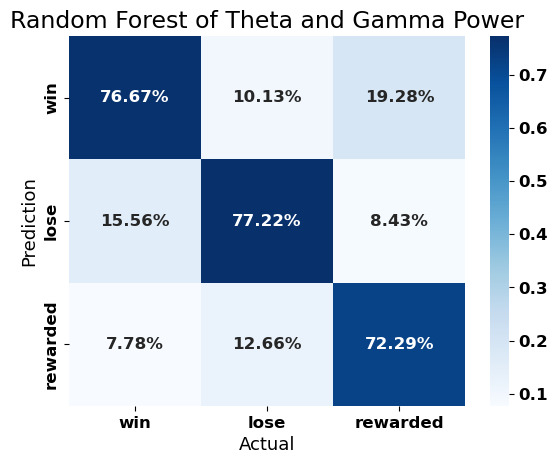

In [49]:
#compute the confusion matrix.
cm = confusion_matrix(all_predictions,all_y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of Theta and Gamma Power',fontsize=17)
plt.savefig("./proc/rf_original_power_confusion_matrix.png")
plt.show()

In [50]:
forest_importances = pd.concat(all_importances)

In [51]:
# forest_importances = pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index()
forest_importances = forest_importances.rename(columns={0: "mdi"})

In [52]:
mean_importances = forest_importances.groupby("index").mean().reset_index()
mean_importances = mean_importances.rename(columns={"mdi": "mean_mdi"})

In [53]:
sem_importances = forest_importances.groupby("index").sem().reset_index()
sem_importances = sem_importances.rename(columns={"mdi": "sem_mdi"})

In [54]:
forest_importances = pd.merge(left=mean_importances, left_on="index", right=sem_importances, right_on="index")

In [55]:
sem_importances

,index,sem_mdi
0,BLA_LH_gamma_band_coherence,0.000849
1,BLA_LH_gamma_band_granger,0.000671
2,BLA_LH_theta_band_coherence,0.001339
3,BLA_LH_theta_band_granger,0.000970
4,BLA_MD_gamma_band_coherence,0.001226
...,...,...
65,vHPC_MD_theta_band_granger,0.001566
66,vHPC_gamma_band_power,0.000808
67,vHPC_mPFC_gamma_band_granger,0.001028
68,vHPC_mPFC_theta_band_granger,0.000971


In [56]:
forest_importances

,index,mean_mdi,sem_mdi
0,BLA_LH_gamma_band_coherence,0.009681,0.000849
1,BLA_LH_gamma_band_granger,0.015746,0.000671
2,BLA_LH_theta_band_coherence,0.014737,0.001339
3,BLA_LH_theta_band_granger,0.011083,0.000970
4,BLA_MD_gamma_band_coherence,0.010077,0.001226
...,...,...,...
65,vHPC_MD_theta_band_granger,0.015223,0.001566
66,vHPC_gamma_band_power,0.019244,0.000808
67,vHPC_mPFC_gamma_band_granger,0.014669,0.001028
68,vHPC_mPFC_theta_band_granger,0.009597,0.000971


In [57]:
# forest_importances = forest_importances.groupby("index").mean().reset_index()
forest_importances = forest_importances.sort_values("mean_mdi", ascending=False).reset_index(drop=True)

In [58]:
forest_importances["brain_regions"] = forest_importances["index"].apply(lambda x: "_".join(x.split("band")[0].split("_")[:-2]))
forest_importances["band"] = forest_importances["index"].apply(lambda x: x.split("band")[0].strip("_").split("_")[-1])
forest_importances["measure"] = forest_importances["index"].apply(lambda x:x.split("_")[-1])

In [59]:
forest_importances = forest_importances.iloc[:20]

In [60]:
forest_importances["band"]

0     theta
1     gamma
2     gamma
3     theta
4     theta
5     theta
6     theta
7     theta
8     gamma
9     theta
10    theta
11    theta
12    gamma
13    gamma
14    theta
15    theta
16    gamma
17    gamma
18    gamma
19    gamma
Name: band, dtype: object

In [61]:
forest_importances["color"] = forest_importances["band"].map(BAND_TO_COLOR)
forest_importances["pattern"] = forest_importances["measure"].map(MEASURE_TO_PATTERN)

In [62]:
forest_importances

,index,mean_mdi,sem_mdi,brain_regions,band,measure,color,pattern
0,LH_theta_band_power,0.034171,0.002908,LH,theta,power,#FFAF00,
1,LH_vHPC_gamma_band_coherence,0.029144,0.002766,LH_vHPC,gamma,coherence,#15616F,x
2,MD_gamma_band_power,0.029055,0.002666,MD,gamma,power,#15616F,
3,LH_vHPC_theta_band_coherence,0.027599,0.001188,LH_vHPC,theta,coherence,#FFAF00,x
4,vHPC_BLA_theta_band_granger,0.026230,0.002745,vHPC_BLA,theta,granger,#FFAF00,o
5,BLA_theta_band_power,0.025543,0.001344,BLA,theta,power,#FFAF00,
6,vHPC_theta_band_power,0.024710,0.002547,vHPC,theta,power,#FFAF00,
7,vHPC_LH_theta_band_granger,0.024158,0.003097,vHPC_LH,theta,granger,#FFAF00,o
8,LH_MD_gamma_band_coherence,0.021892,0.002073,LH_MD,gamma,coherence,#15616F,x
9,MD_BLA_theta_band_granger,0.021792,0.001400,MD_BLA,theta,granger,#FFAF00,o


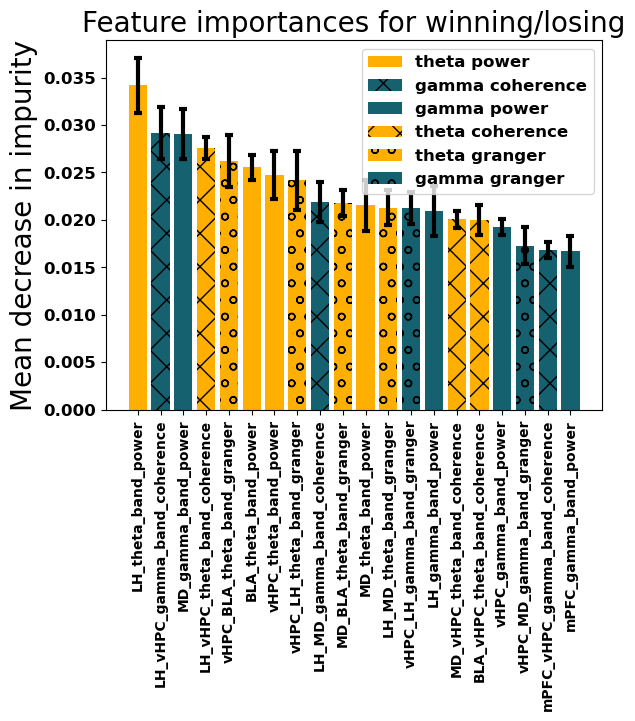

In [63]:
for index, row in forest_importances.iterrows():
    plt.bar(row["index"], row["mean_mdi"], color=row["color"], label="{} {}".format(row["band"], row["measure"]), hatch=row["pattern"])

plt.xticks(fontsize=10, rotation=90)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


plt.errorbar(forest_importances.index, forest_importances["mean_mdi"],
    yerr=forest_importances["sem_mdi"],
    color='k',
    capsize=3,
    linestyle='None',
    elinewidth=3,
    capthick=3)

plt.title("Feature importances for winning/losing", fontsize=20)
plt.ylabel("Mean decrease in impurity", fontsize=20)
# plt.tight_layout()
# plt.legend(ncol=3)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
# plt.savefig("./proc/network/rf_power_feature_importance.png")
plt.show()

- Shuffling the labels

In [64]:
shuffled_scores=[]

kFold=KFold(n_splits=5,shuffle=True)

all_y_test = []
all_predictions = []
all_importances = []

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array):
    
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = shuffle(network_df[GROUPING].values[train_index])
    y_test = network_df[GROUPING].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    shuffled_scores.append(clf.score(X_test,y_test))

    all_y_test += y_test.tolist()
    all_predictions += clf.predict(X_test).tolist()
    importances = clf.feature_importances_
    all_importances.append(pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index())

mean_original_scores = np.mean(shuffled_scores)
# 0.9393939393939394

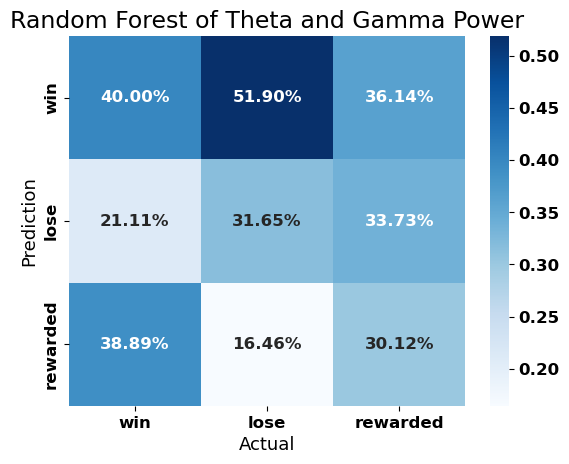

In [65]:
#compute the confusion matrix.
cm = confusion_matrix(all_predictions,all_y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of Theta and Gamma Power',fontsize=17)
plt.savefig("./proc/rf_original_power_confusion_matrix.png")
plt.show()

In [66]:
shuffled_scores

[0.29411764705882354, 0.43137254901960786, 0.36, 0.42, 0.2]

In [67]:
original_scores

[0.7450980392156863, 0.8431372549019608, 0.82, 0.68, 0.68]

In [68]:
np.std(shuffled_scores)

0.08584649623038018

In [69]:
np.std(original_scores)

0.0683111590882373

In [70]:
from scipy import stats


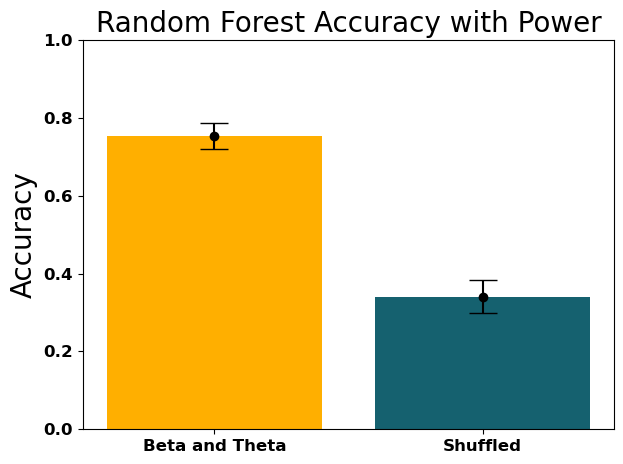

In [71]:
plt.bar(x=["Beta and Theta", "Shuffled"], height=[np.mean(original_scores), np.mean(shuffled_scores)], color= ["#FFAF00", "#15616F"])
plt.ylabel("Accuracy", fontsize=20)
plt.title("Random Forest Accuracy with Power", fontsize=20)
plt.errorbar(["Beta and Theta", "Shuffled"], [np.mean(original_scores), np.mean(shuffled_scores)], yerr=[stats.sem(original_scores), stats.sem(shuffled_scores)], fmt="o", color="black", capsize=10)
plt.ylim(0,1)
plt.tight_layout()
# plt.savefig("./proc/rf_power_predictions_score.png")

In [72]:
sub_features = ["power", "coherence", "granger", "theta", "gamma"]

In [73]:
# [col.split("_")[0] for col in MERGED_LFP_AND_SLEAP if "trace" in col]
brain_regions = [col.split("_")[0] for col in MERGED_LFP_AND_SLEAP if "baseline-trial_lfp_trace" in col]

In [74]:
sub_feature_to_columns = {feature: [col for col in feature_columns if feature in col] for feature in sub_features}

In [75]:
for region in brain_regions:
    sub_feature_to_columns["{} removed".format(region)] = [col for col in feature_columns if region not in col]

In [76]:
sub_feature_to_columns

{'power': ['mPFC_theta_band_power',
  'mPFC_gamma_band_power',
  'vHPC_theta_band_power',
  'vHPC_gamma_band_power',
  'BLA_theta_band_power',
  'BLA_gamma_band_power',
  'LH_theta_band_power',
  'LH_gamma_band_power',
  'MD_theta_band_power',
  'MD_gamma_band_power'],
 'coherence': ['BLA_LH_theta_band_coherence',
  'BLA_LH_gamma_band_coherence',
  'BLA_MD_theta_band_coherence',
  'BLA_MD_gamma_band_coherence',
  'BLA_mPFC_theta_band_coherence',
  'BLA_mPFC_gamma_band_coherence',
  'BLA_vHPC_theta_band_coherence',
  'BLA_vHPC_gamma_band_coherence',
  'LH_MD_theta_band_coherence',
  'LH_MD_gamma_band_coherence',
  'LH_mPFC_theta_band_coherence',
  'LH_mPFC_gamma_band_coherence',
  'LH_vHPC_theta_band_coherence',
  'LH_vHPC_gamma_band_coherence',
  'MD_mPFC_theta_band_coherence',
  'MD_mPFC_gamma_band_coherence',
  'MD_vHPC_theta_band_coherence',
  'MD_vHPC_gamma_band_coherence',
  'mPFC_vHPC_theta_band_coherence',
  'mPFC_vHPC_gamma_band_coherence'],
 'granger': ['BLA_LH_theta_band_gran

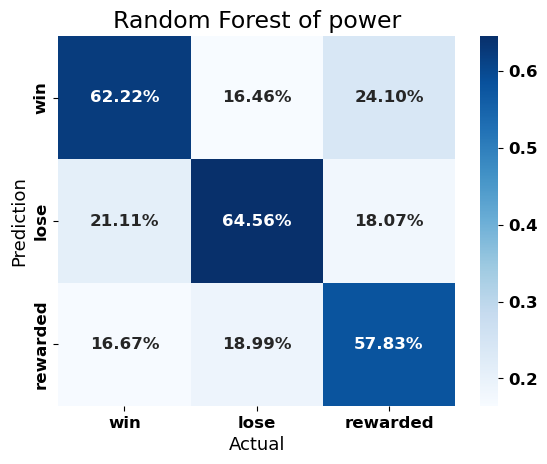

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


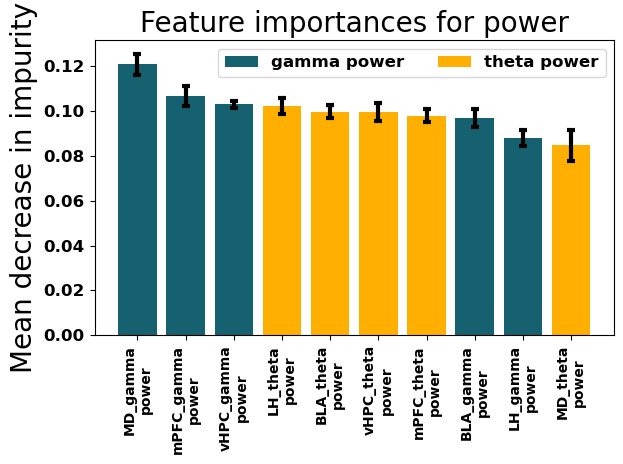

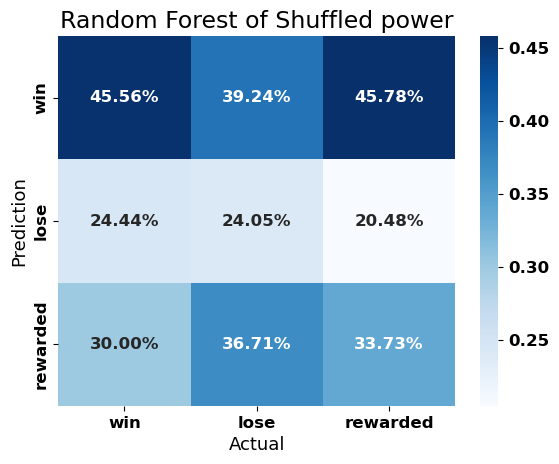

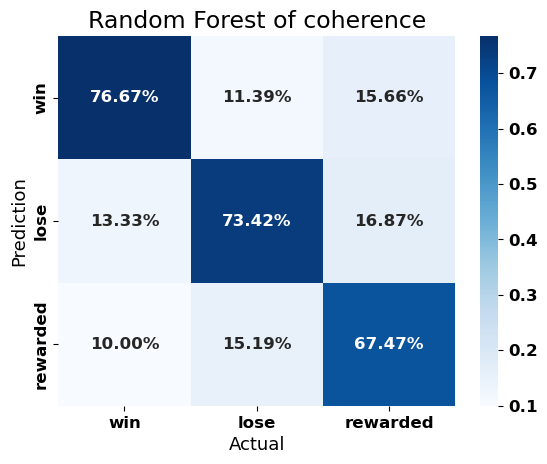

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


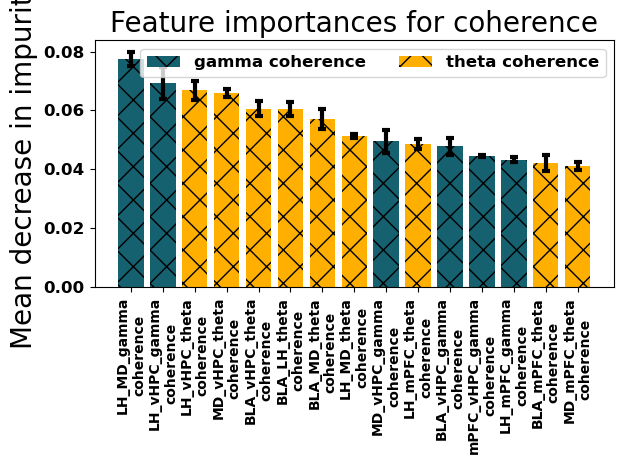

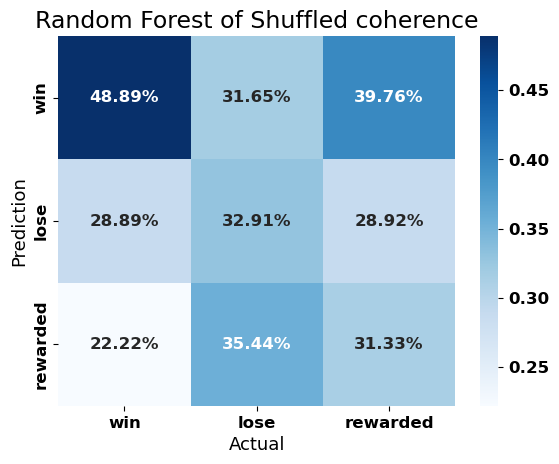

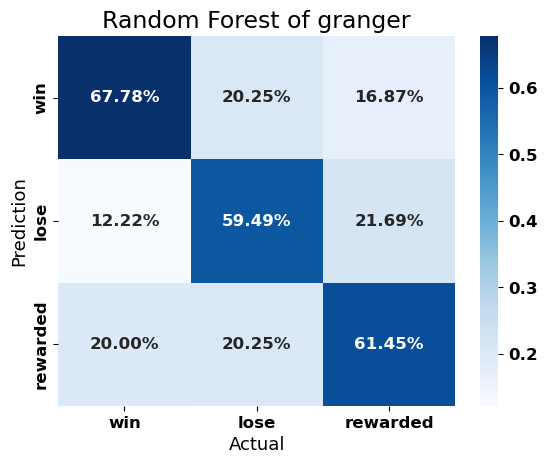

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


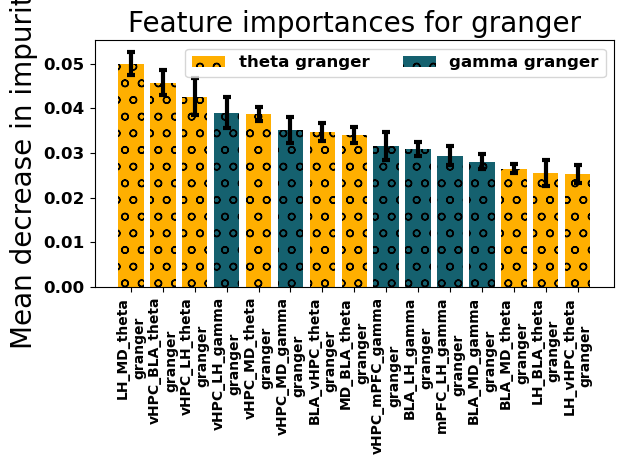

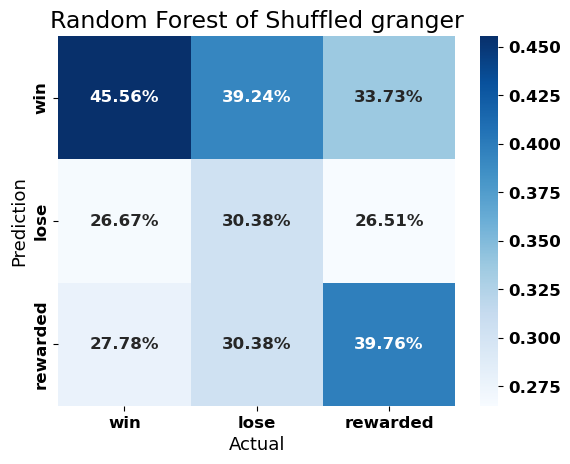

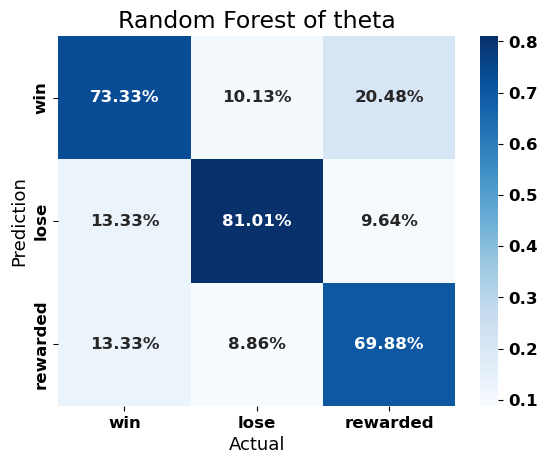

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


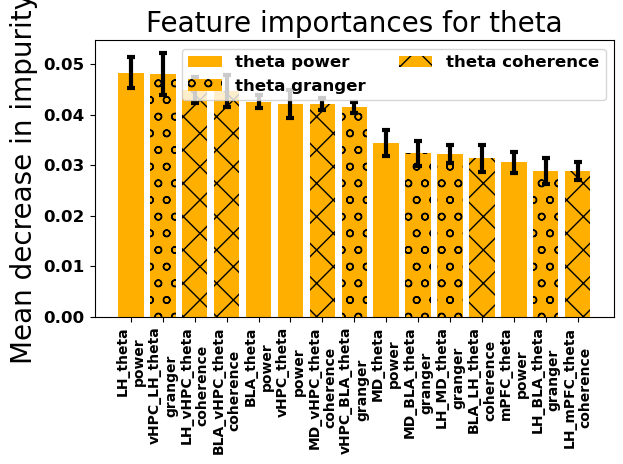

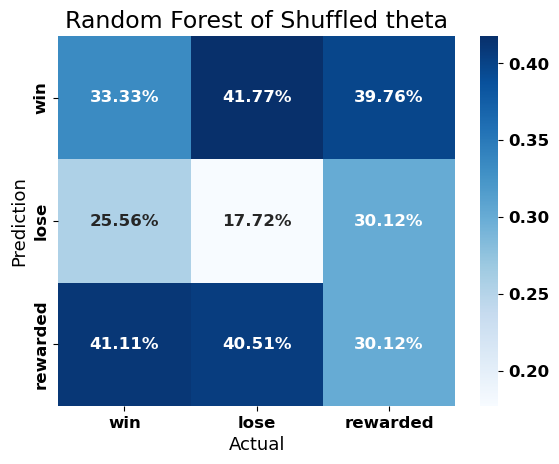

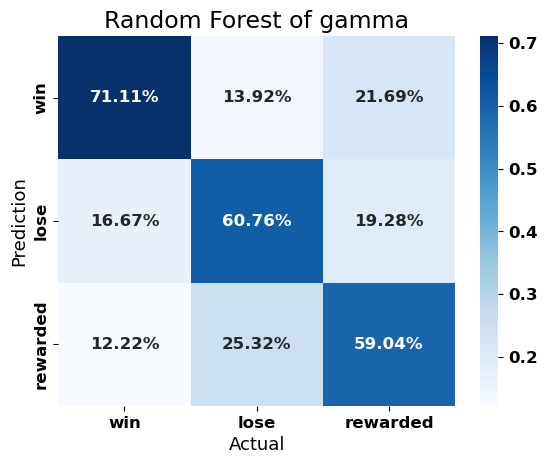

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


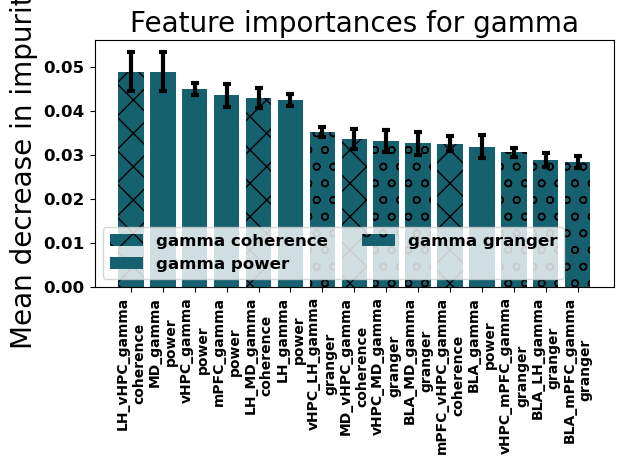

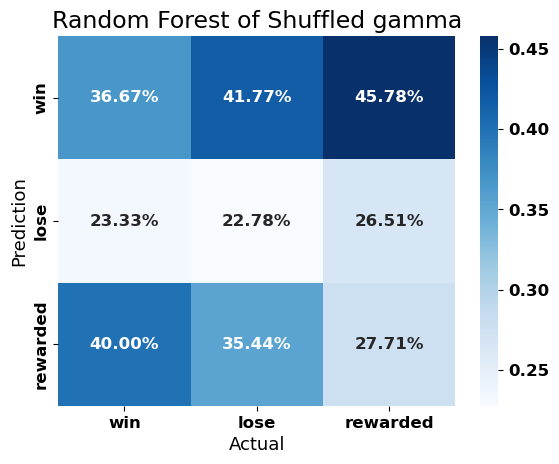

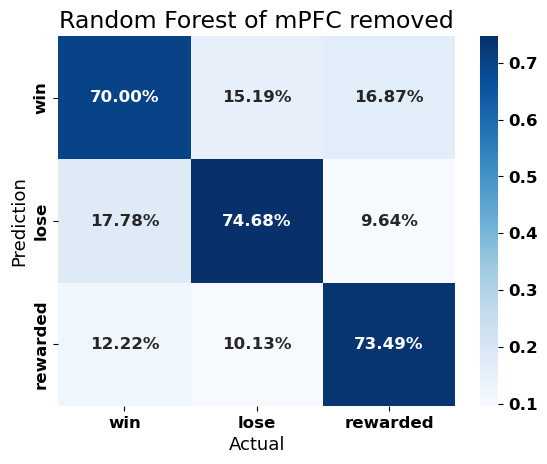

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


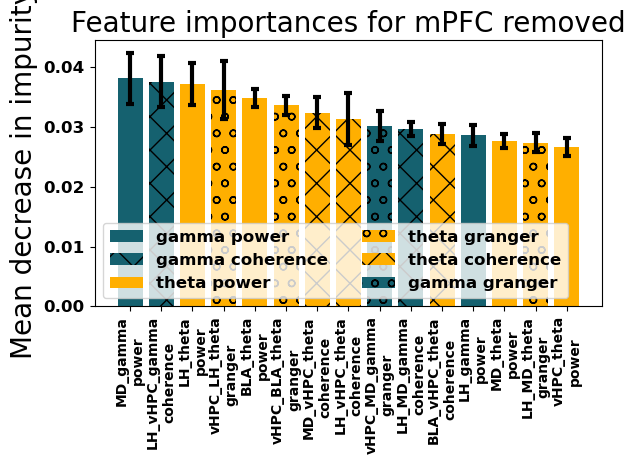

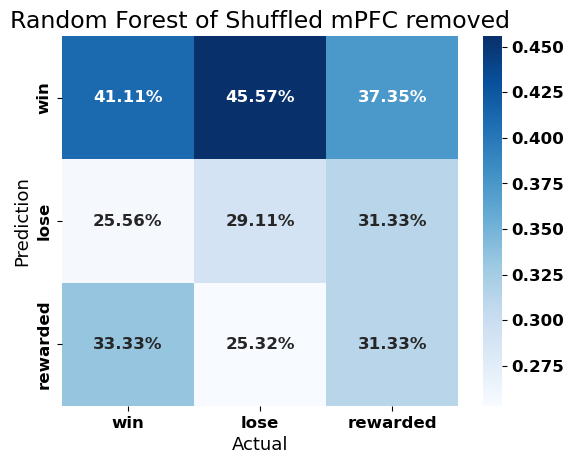

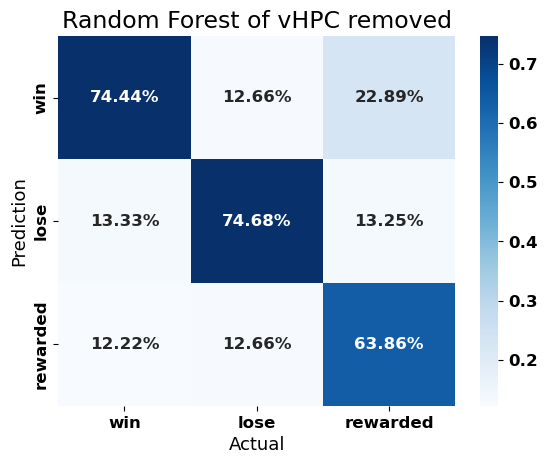

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


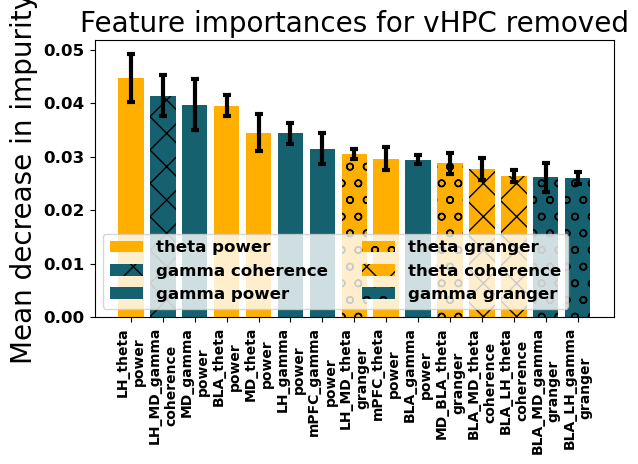

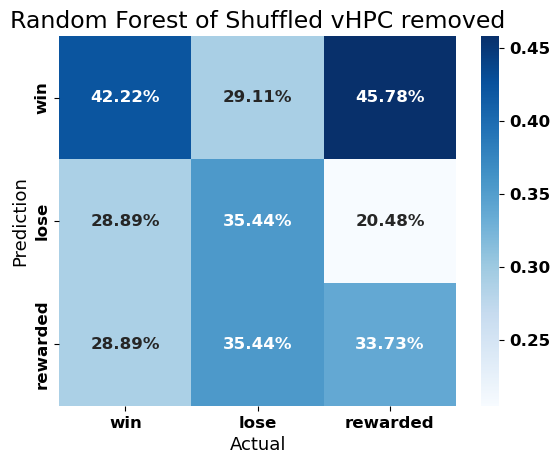

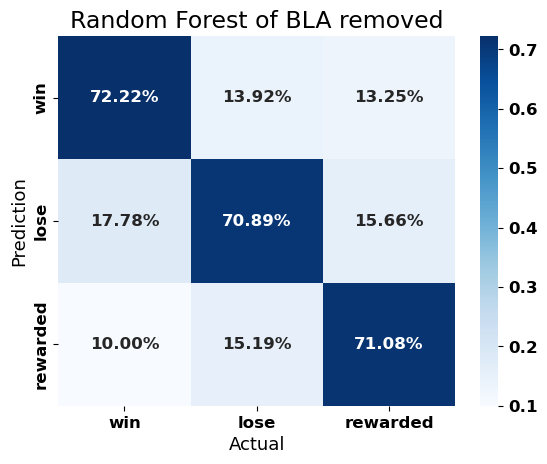

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


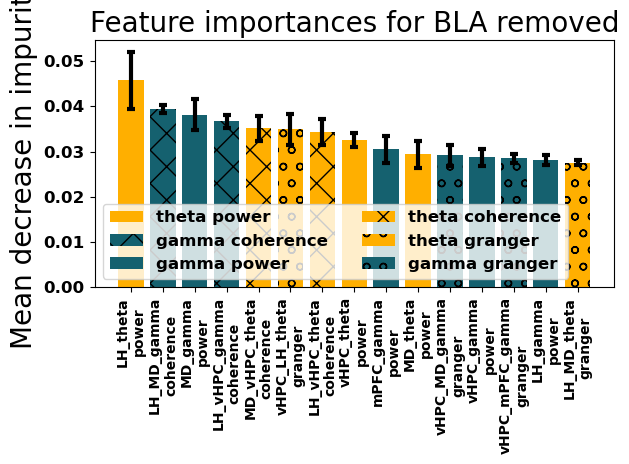

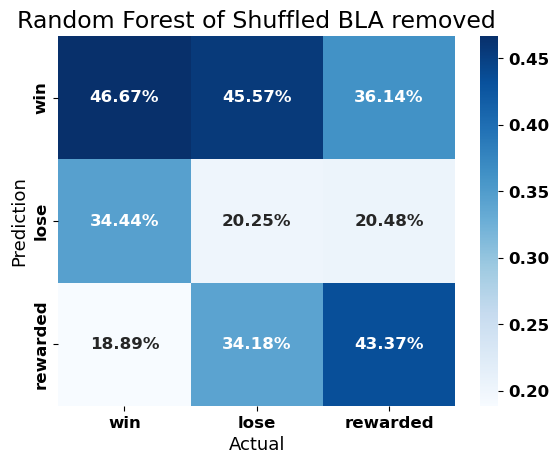

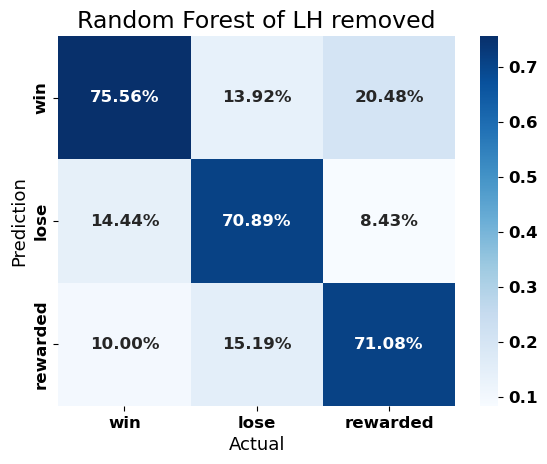

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


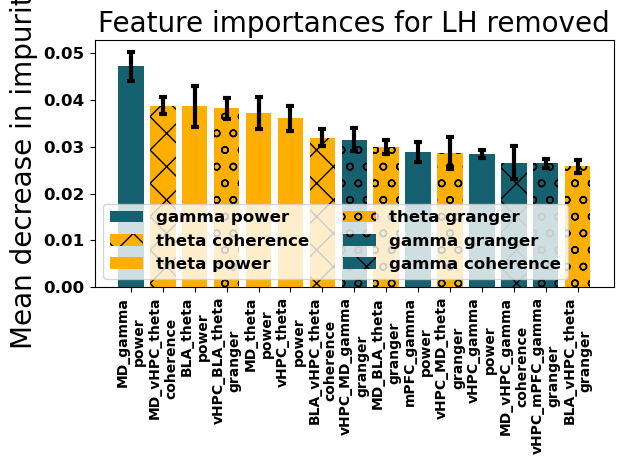

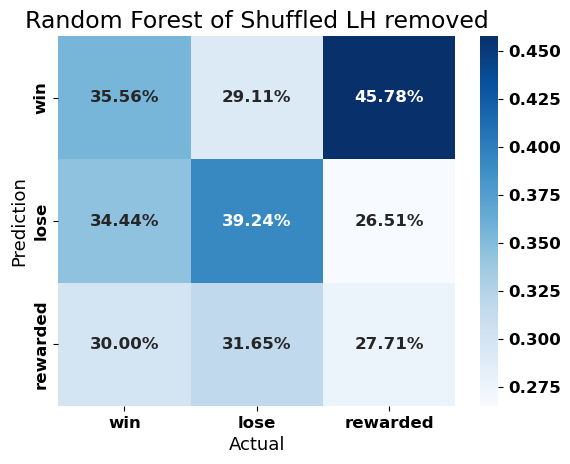

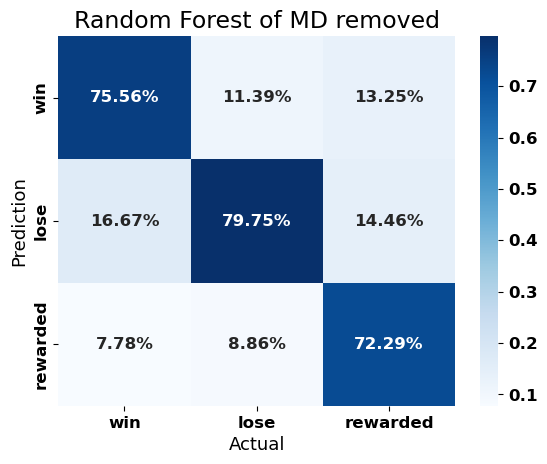

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


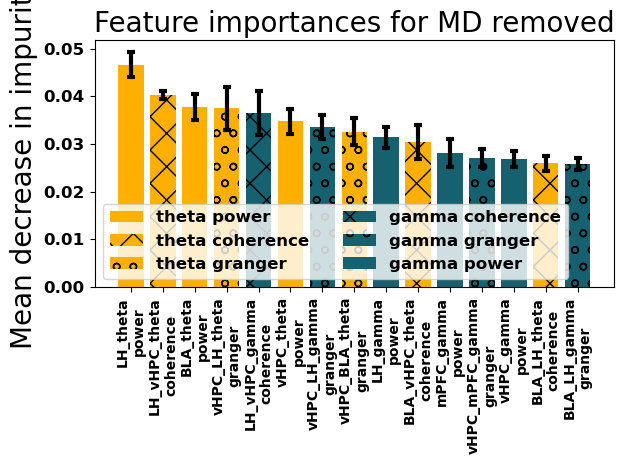

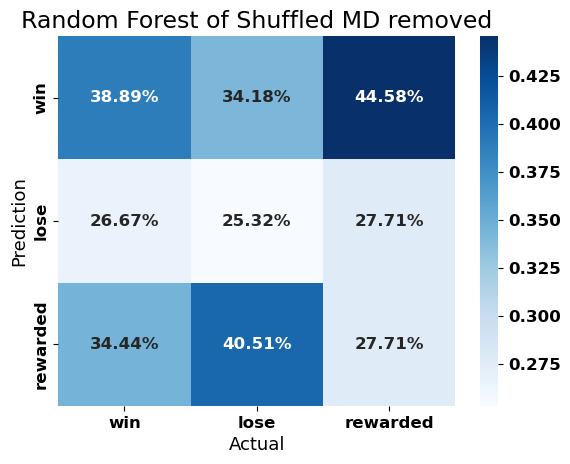

In [77]:
feature_to_scores = {}
for feature, all_columns in sub_feature_to_columns.items():
    network_array = network_df[all_columns].values

    original_scores=[]
    # kFold=KFold(n_splits=5,shuffle=True)
    kFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    
    all_y_test = []
    all_predictions = []
    all_importances = []
    
    # creating a RF classifier 
    clf = RandomForestClassifier(n_estimators = 100)   
    for train_index, test_index in kFold.split(network_array, network_df[GROUPING]):
        
        X_train = network_array[train_index]  
        X_test = network_array[test_index]
        y_train = network_df[GROUPING].values[train_index]
        y_test = network_df[GROUPING].values[test_index]
    
        # Training the model on the training dataset 
        # fit function is used to train the model using the training sets as parameters 
        clf.fit(X_train, y_train) 
        original_scores.append(clf.score(X_test,y_test))
    
        all_y_test += y_test.tolist()
        all_predictions += clf.predict(X_test).tolist()
        importances = clf.feature_importances_
        all_importances.append(pd.DataFrame(importances, index=all_columns).sort_values(0, ascending=False).reset_index())
    
    mean_original_scores = np.mean(original_scores)
    
    #compute the confusion matrix.
    cm = confusion_matrix(all_predictions, all_y_test, labels=OUTCOME_LABELS)
    
    #Plot the confusion matrix.
    sns.heatmap(cm/sum(cm), 
                annot=True,
                # fmt='g', 
                fmt='.2%',
               cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
    # sns.light_palette("seagreen", as_cmap=True)
    
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Random Forest of {}'.format(feature),fontsize=17)
    plt.savefig("./proc/network/rf_{}_confusion_matrix.png".format(feature))
    plt.savefig("./proc/network/rf_{}_confusion_matrix.eps".format(feature))

    plt.show()   
    
    fig, ax = plt.subplots()
    forest_importances = pd.concat(all_importances)
    # forest_importances = pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index()
    forest_importances = forest_importances.rename(columns={0: "mdi"})
    mean_importances = forest_importances.groupby("index").mean().reset_index()
    mean_importances = mean_importances.rename(columns={"mdi": "mean_mdi"})
    sem_importances = forest_importances.groupby("index").sem().reset_index()
    sem_importances = sem_importances.rename(columns={"mdi": "sem_mdi"})
    forest_importances = pd.merge(left=mean_importances, left_on="index", right=sem_importances, right_on="index")
    
    # forest_importances = forest_importances.groupby("index").mean().reset_index()
    forest_importances = forest_importances.sort_values("mean_mdi", ascending=False).reset_index(drop=True)
    forest_importances["brain_regions"] = forest_importances["index"].apply(lambda x: "_".join(x.split("band")[0].split("_")[:-2]))
    forest_importances["band"] = forest_importances["index"].apply(lambda x: x.split("band")[0].strip("_").split("_")[-1])
    forest_importances["measure"] = forest_importances["index"].apply(lambda x:x.split("_")[-1])
    forest_importances["index"] = forest_importances["index"].apply(lambda x: x.replace("_band_", "\n"))
    # forest_importances["index"] = forest_importances["index"].apply(lambda x: "_".join(x.split("_")[:-]))

    
    forest_importances = forest_importances.iloc[:15]
    forest_importances["color"] = forest_importances["band"].map(BAND_TO_COLOR)
    forest_importances["pattern"] = forest_importances["measure"].map(MEASURE_TO_PATTERN)
    
    for index, row in forest_importances.iterrows():
        plt.bar(row["index"], row["mean_mdi"], color=row["color"], label="{} {}".format(row["band"], row["measure"]), hatch=row["pattern"])
    
    plt.xticks(fontsize=10, rotation=90)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    
    plt.errorbar(forest_importances.index, forest_importances["mean_mdi"],
        yerr=forest_importances["sem_mdi"],
        color='k',
        capsize=3,
        linestyle='None',
        elinewidth=3,
        capthick=3)
    
    plt.title("Feature importances for {}".format(feature), fontsize=20)
    plt.ylabel("Mean decrease in impurity", fontsize=20)
    plt.tight_layout()
    # plt.legend(ncol=3)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), ncol=2)
    plt.savefig("./proc/network/rf_feature_importance_{}.png".format(feature))
    plt.savefig("./proc/network/rf_feature_importance_{}.eps".format(feature))

    plt.show()

    ##### SHUFFLING DATA ###############    
    shuffled_scores=[]
    
    kFold=KFold(n_splits=5,shuffle=True)
    
    all_y_test = []
    all_predictions = []
    all_importances = []
    
    # creating a RF classifier 
    clf = RandomForestClassifier(n_estimators = 100)   
    for train_index, test_index in kFold.split(network_array):
        
        X_train = network_array[train_index]  
        X_test = network_array[test_index]
        y_train = shuffle(network_df[GROUPING].values[train_index])
        y_test = network_df[GROUPING].values[test_index]
    
        # Training the model on the training dataset 
        # fit function is used to train the model using the training sets as parameters 
        clf.fit(X_train, y_train) 
        shuffled_scores.append(clf.score(X_test,y_test))
    
        all_y_test += y_test.tolist()
        all_predictions += clf.predict(X_test).tolist()
    
    mean_original_scores = np.mean(shuffled_scores)

    #compute the confusion matrix.
    cm = confusion_matrix(all_predictions,all_y_test, labels=OUTCOME_LABELS)
    
    #Plot the confusion matrix.
    sns.heatmap(cm/sum(cm), 
                annot=True,
                # fmt='g', 
                fmt='.2%',
               cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
    # sns.light_palette("seagreen", as_cmap=True)
    
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Random Forest of Shuffled {}'.format(feature),fontsize=17)
    # plt.savefig("./proc/rf_original_power_confusion_matrix.png")
    plt.show()
    feature_to_scores[feature] = (original_scores, shuffled_scores)



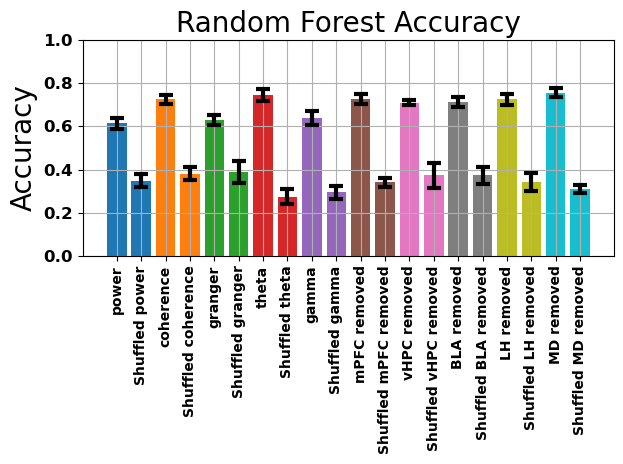

In [78]:
fig, ax = plt.subplots()
for feat, (original_score, shuffled_score) in feature_to_scores.items():

    plt.bar(x=["{}".format(feat), "Shuffled {}".format(feat)], height=[np.mean(original_score), np.mean(shuffled_score)])#, color= ["#FFAF00", "#15616F"])
    plt.ylabel("Accuracy", fontsize=20)
    plt.title("Random Forest Accuracy", fontsize=20)
    plt.errorbar(["{}".format(feat), "Shuffled {}".format(feat)], [np.mean(original_score), np.mean(shuffled_score)], yerr=[stats.sem(original_score), stats.sem(shuffled_score)], color="black", capsize=5, linestyle='None',
        elinewidth=3,
        capthick=3)
plt.ylim(0,1)
plt.xticks(fontsize=10, rotation=90)
plt.grid()
plt.tight_layout()

plt.savefig("./proc/network/rf_all_accuracy.png")
plt.savefig("./proc/network/rf_all_accuracy.eps")


# Using PCA

In [79]:
from sklearn.decomposition import PCA



In [80]:
from sklearn.decomposition import FastICA
import numpy as np

from sklearn.decomposition import PCA

In [81]:
from sklearn.preprocessing import StandardScaler


In [82]:
network_array = network_df[feature_columns].values

original_scores=[]
# kFold=KFold(n_splits=5,shuffle=True)
kFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


all_y_test = []
all_predictions = []
all_importances = []

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array, network_df[GROUPING]):
    scaler = StandardScaler()   
    dim_reducer = FastICA(n_components=5)
    # dim_reducer = PCA(n_components=20)

    scaler.fit(network_array[train_index])
    X_train = scaler.transform(network_array[train_index]) 
    dim_reducer.fit(X_train)
    X_train = dim_reducer.transform(X_train)
 
    X_test = dim_reducer.transform(scaler.transform(network_array[test_index]))
    y_train = network_df[GROUPING].values[train_index]
    y_test = network_df[GROUPING].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    original_scores.append(clf.score(X_test,y_test))

    all_y_test += y_test.tolist()
    all_predictions += clf.predict(X_test).tolist()
    importances = clf.feature_importances_
    all_importances.append(pd.DataFrame(importances).sort_values(0, ascending=False).reset_index())

mean_original_scores = np.mean(original_scores)


In [83]:
mean_original_scores

0.6232156862745097

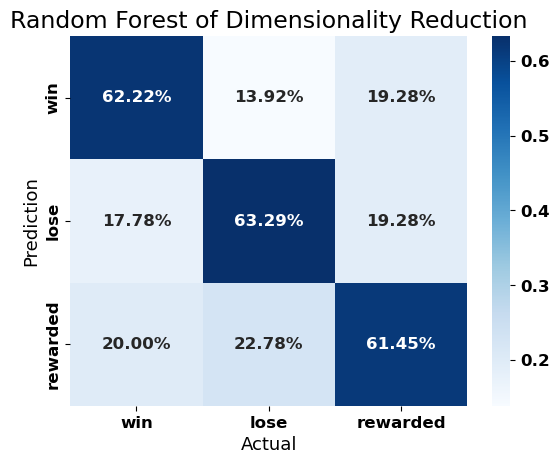

In [84]:
#compute the confusion matrix.
cm = confusion_matrix(all_predictions, all_y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of Dimensionality Reduction'.format(),fontsize=17)
# plt.savefig("./proc/network/rf_{}_confusion_matrix.png".format(feature))
# plt.savefig("./proc/network/rf_{}_confusion_matrix.eps".format(feature))

plt.show()   

In [85]:
from sklearn.pipeline import Pipeline

In [86]:
OUTCOME_TO_COLOR

{'lose': '#951a1d',
 'omission': '#af780d',
 'rewarded': '#0499af',
 'win': '#3853a3',
 'lose_comp': '#951a1d',
 'win_comp': '#3853a3',
 'lose_non_comp': '#e67073',
 'win_non_comp': '#93a5da'}

In [87]:
network_df["trial_outcome"].unique()

array(['win', 'lose', 'rewarded'], dtype=object)

In [88]:
network_df["competition_closeness"]

0      win_non_comp
1      win_non_comp
2      win_non_comp
3      win_non_comp
4      win_non_comp
           ...     
264        rewarded
265        rewarded
266        rewarded
267        rewarded
269        rewarded
Name: competition_closeness, Length: 252, dtype: object

In [97]:
GROUPING = "trial_outcome"

In [126]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP if "band" in col and "beta" not in col]

In [127]:
feature_columns = [col for col in feature_columns if "granger" in col]

In [128]:
feature_columns

['BLA_LH_theta_band_granger',
 'BLA_LH_gamma_band_granger',
 'LH_BLA_theta_band_granger',
 'LH_BLA_gamma_band_granger',
 'BLA_MD_theta_band_granger',
 'BLA_MD_gamma_band_granger',
 'MD_BLA_theta_band_granger',
 'MD_BLA_gamma_band_granger',
 'BLA_mPFC_theta_band_granger',
 'BLA_mPFC_gamma_band_granger',
 'mPFC_BLA_theta_band_granger',
 'mPFC_BLA_gamma_band_granger',
 'BLA_vHPC_theta_band_granger',
 'BLA_vHPC_gamma_band_granger',
 'vHPC_BLA_theta_band_granger',
 'vHPC_BLA_gamma_band_granger',
 'LH_MD_theta_band_granger',
 'LH_MD_gamma_band_granger',
 'MD_LH_theta_band_granger',
 'MD_LH_gamma_band_granger',
 'LH_mPFC_theta_band_granger',
 'LH_mPFC_gamma_band_granger',
 'mPFC_LH_theta_band_granger',
 'mPFC_LH_gamma_band_granger',
 'LH_vHPC_theta_band_granger',
 'LH_vHPC_gamma_band_granger',
 'vHPC_LH_theta_band_granger',
 'vHPC_LH_gamma_band_granger',
 'MD_mPFC_theta_band_granger',
 'MD_mPFC_gamma_band_granger',
 'mPFC_MD_theta_band_granger',
 'mPFC_MD_gamma_band_granger',
 'MD_vHPC_theta_

In [129]:
network_array = network_df[feature_columns].values

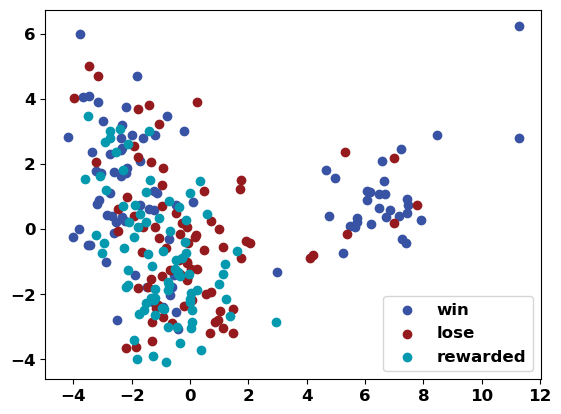

In [130]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(network_array)
network_df = network_df.reset_index(drop=True)
for group in network_df[GROUPING].unique():
    current_df = network_df[network_df[GROUPING] == group]
    
    plot = plt.scatter(Xt[current_df.index,0], Xt[current_df.index,1], c=OUTCOME_TO_COLOR[group], label=group)
    # plt.legend(handles=plot.legend_elements()[0], labels=list(network_df[GROUPING]))
    plt.legend()
    
plt.show()

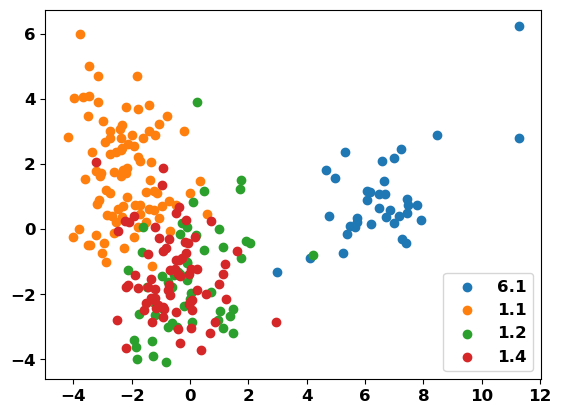

In [131]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(network_array)
network_df = network_df.reset_index(drop=True)
for group in network_df["current_subject"].unique():
    current_df = network_df[network_df["current_subject"] == group]
    
    plot = plt.scatter(Xt[current_df.index,0], Xt[current_df.index,1], label=group)
    # plt.legend(handles=plot.legend_elements()[0], labels=list(network_df[GROUPING]))
    plt.legend()
    
plt.show()

In [96]:
raise ValueError()

ValueError: 

In [ ]:
network_df

In [ ]:
current_df

In [ ]:
current_df.index

In [ ]:
current_df.index

In [ ]:
list(network_df[GROUPING])

In [ ]:
network_array.shape

In [ ]:
Xt.shape

In [ ]:

network_array = network_df[feature_columns].values

original_scores=[]
# kFold=KFold(n_splits=5,shuffle=True)
kFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


all_y_test = []
all_predictions = []
all_importances = []

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array, network_df[GROUPING]):
    scaler = StandardScaler()   
    dim_reducer = FastICA()
    dim_reducer.fit(network_array[train_index])
    
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = network_df[GROUPING].values[train_index]
    y_test = network_df[GROUPING].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    original_scores.append(clf.score(X_test,y_test))

    all_y_test += y_test.tolist()
    all_predictions += clf.predict(X_test).tolist()
    importances = clf.feature_importances_
    all_importances.append(pd.DataFrame(importances, index=all_columns).sort_values(0, ascending=False).reset_index())

mean_original_scores = np.mean(original_scores)

#compute the confusion matrix.
cm = confusion_matrix(all_predictions, all_y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of {}'.format(feature),fontsize=17)
plt.savefig("./proc/network/rf_{}_confusion_matrix.png".format(feature))
plt.savefig("./proc/network/rf_{}_confusion_matrix.eps".format(feature))

plt.show()   

fig, ax = plt.subplots()
forest_importances = pd.concat(all_importances)
# forest_importances = pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index()
forest_importances = forest_importances.rename(columns={0: "mdi"})
mean_importances = forest_importances.groupby("index").mean().reset_index()
mean_importances = mean_importances.rename(columns={"mdi": "mean_mdi"})
sem_importances = forest_importances.groupby("index").sem().reset_index()
sem_importances = sem_importances.rename(columns={"mdi": "sem_mdi"})
forest_importances = pd.merge(left=mean_importances, left_on="index", right=sem_importances, right_on="index")

# forest_importances = forest_importances.groupby("index").mean().reset_index()
forest_importances = forest_importances.sort_values("mean_mdi", ascending=False).reset_index(drop=True)
forest_importances["brain_regions"] = forest_importances["index"].apply(lambda x: "_".join(x.split("band")[0].split("_")[:-2]))
forest_importances["band"] = forest_importances["index"].apply(lambda x: x.split("band")[0].strip("_").split("_")[-1])
forest_importances["measure"] = forest_importances["index"].apply(lambda x:x.split("_")[-1])
forest_importances["index"] = forest_importances["index"].apply(lambda x: x.replace("_band_", "\n"))
# forest_importances["index"] = forest_importances["index"].apply(lambda x: "_".join(x.split("_")[:-]))


forest_importances = forest_importances.iloc[:15]
forest_importances["color"] = forest_importances["band"].map(BAND_TO_COLOR)
forest_importances["pattern"] = forest_importances["measure"].map(MEASURE_TO_PATTERN)

for index, row in forest_importances.iterrows():
    plt.bar(row["index"], row["mean_mdi"], color=row["color"], label="{} {}".format(row["band"], row["measure"]), hatch=row["pattern"])

plt.xticks(fontsize=10, rotation=90)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


plt.errorbar(forest_importances.index, forest_importances["mean_mdi"],
    yerr=forest_importances["sem_mdi"],
    color='k',
    capsize=3,
    linestyle='None',
    elinewidth=3,
    capthick=3)

plt.title("Feature importances for {}".format(feature), fontsize=20)
plt.ylabel("Mean decrease in impurity", fontsize=20)
plt.tight_layout()
# plt.legend(ncol=3)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol=2)
plt.savefig("./proc/network/rf_feature_importance_{}.png".format(feature))
plt.savefig("./proc/network/rf_feature_importance_{}.eps".format(feature))

plt.show()

##### SHUFFLING DATA ###############    
shuffled_scores=[]

kFold=KFold(n_splits=5,shuffle=True)

all_y_test = []
all_predictions = []
all_importances = []

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array):
    
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = shuffle(network_df[GROUPING].values[train_index])
    y_test = network_df[GROUPING].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    shuffled_scores.append(clf.score(X_test,y_test))

    all_y_test += y_test.tolist()
    all_predictions += clf.predict(X_test).tolist()

mean_original_scores = np.mean(shuffled_scores)

#compute the confusion matrix.
cm = confusion_matrix(all_predictions,all_y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of Shuffled {}'.format(feature),fontsize=17)
# plt.savefig("./proc/rf_original_power_confusion_matrix.png")
plt.show()
feature_to_scores[feature] = (original_scores, shuffled_scores)



In [ ]:
# OLD CODE DOWN BELOW

In [ ]:
raise ValueError()

In [ ]:
feature_to_scores

In [ ]:
shuffled_scores=[]

kFold=KFold(n_splits=5,shuffle=True)

all_y_test = []
all_predictions = []
all_importances = []

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array):
    
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = shuffle(network_df[].values[train_index])
    y_test = network_df[].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    shuffled_scores.append(clf.score(X_test,y_test))

    all_y_test += y_test.tolist()
    all_predictions += clf.predict(X_test).tolist()
    importances = clf.feature_importances_
    all_importances.append(pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index())

mean_original_scores = np.mean(shuffled_scores)
# 0.9393939393939394

In [ ]:
#compute the confusion matrix.
cm = confusion_matrix(all_predictions,all_y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of Theta and Gamma Power',fontsize=17)
plt.savefig("./proc/rf_original_power_confusion_matrix.png")
plt.show()

In [ ]:
shuffled_scores

In [ ]:
original_scores

In [ ]:
np.std(shuffled_scores)

In [ ]:
np.std(original_scores)

In [ ]:
from scipy import stats


In [ ]:
plt.bar(x=["Beta and Theta", "Shuffled"], height=[np.mean(original_scores), np.mean(shuffled_scores)], color= ["#FFAF00", "#15616F"])
plt.ylabel("Accuracy", fontsize=20)
plt.title("Random Forest Accuracy with Power", fontsize=20)
plt.errorbar(["Beta and Theta", "Shuffled"], [np.mean(original_scores), np.mean(shuffled_scores)], yerr=[stats.sem(original_scores), stats.sem(shuffled_scores)], fmt="o", color="black", capsize=10)
plt.ylim(0,1)
plt.tight_layout()
# plt.savefig("./proc/rf_power_predictions_score.png")

- Filtering out for trials that are win vs loss

In [ ]:
network_df = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP[].isin(OUTCOME_LABELS)]


In [ ]:
network_df.groupby().count()

In [ ]:
network_array = network_df[feature_columns].values

In [ ]:
network_df.head()

In [ ]:
original_scores=[]
kFold=KFold(n_splits=5,shuffle=True)

all_y_test = []
all_predictions = []
all_importances = []

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array):
    
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = network_df[].values[train_index]
    y_test = network_df[].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    original_scores.append(clf.score(X_test,y_test))

    all_y_test += y_test.tolist()
    all_predictions += clf.predict(X_test).tolist()
    importances = clf.feature_importances_
    all_importances.append(pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index())

mean_original_scores = np.mean(original_scores)
# 0.9393939393939394


In [ ]:
y_test

In [ ]:
original_scores

In [ ]:
y_test

In [ ]:
clf.predict(X_test)

In [ ]:
OUTCOME_LABELS=OUTCOME_LABELS

In [ ]:
#compute the confusion matrix.
cm = confusion_matrix(all_predictions,all_y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of Theta and Gamma Power',fontsize=17)
plt.savefig("./proc/rf_original_power_confusion_matrix.png")
plt.show()

In [ ]:
forest_importances = pd.concat(all_importances)

In [ ]:
# forest_importances = pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index()
forest_importances = forest_importances.rename(columns={0: "mdi"})

In [ ]:
mean_importances = forest_importances.groupby("index").mean().reset_index()
mean_importances = mean_importances.rename(columns={"mdi": "mean_mdi"})

In [ ]:
sem_importances = forest_importances.groupby("index").sem().reset_index()
sem_importances = sem_importances.rename(columns={"mdi": "sem_mdi"})

In [ ]:
forest_importances = pd.merge(left=mean_importances, left_on="index", right=sem_importances, right_on="index")

In [ ]:
sem_importances

In [ ]:
forest_importances

In [ ]:
# forest_importances = forest_importances.groupby("index").mean().reset_index()
forest_importances = forest_importances.sort_values("mean_mdi", ascending=False).reset_index(drop=True)

In [ ]:
forest_importances["brain_regions"] = forest_importances["index"].apply(lambda x: "_".join(x.split("band")[0].split("_")[:-2]))
forest_importances["band"] = forest_importances["index"].apply(lambda x: x.split("band")[0].strip("_").split("_")[-1])
forest_importances["measure"] = forest_importances["index"].apply(lambda x:x.split("_")[-1])

In [ ]:
forest_importances = forest_importances.iloc[:20]

In [ ]:
forest_importances["band"]

In [ ]:
forest_importances["color"] = forest_importances["band"].map(BAND_TO_COLOR)
forest_importances["pattern"] = forest_importances["measure"].map(MEASURE_TO_PATTERN)

In [ ]:
forest_importances

In [ ]:
for index, row in forest_importances.iterrows():
    plt.bar(row["index"], row["mean_mdi"], color=row["color"], label="{} {}".format(row["band"], row["measure"]), hatch=row["pattern"])

plt.xticks(fontsize=10, rotation=90)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


plt.errorbar(forest_importances.index, forest_importances["mean_mdi"],
    yerr=forest_importances["sem_mdi"],
    color='k',
    capsize=3,
    linestyle='None',
    elinewidth=3,
    capthick=3)

plt.title("Feature importances for winning/losing", fontsize=20)
plt.ylabel("Mean decrease in impurity", fontsize=20)
# plt.tight_layout()
# plt.legend(ncol=3)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.savefig("./proc/network/rf_power_feature_importance.png")
plt.show()

- Shuffling the labels

In [ ]:
shuffled_scores=[]
kFold=KFold(n_splits=5,shuffle=True)

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array):
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = shuffle(network_df[].values[train_index])
    y_test = network_df[].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    shuffled_scores.append(clf.score(X_test,y_test))
mean_shuffled_scores = np.mean(shuffled_scores)
# 0.9393939393939394


In [ ]:
shuffled_scores

In [ ]:
y_test

In [ ]:
clf.predict(X_test)

In [ ]:
clf.predict(X_test),y_test

In [ ]:
labels

In [ ]:
#compute the confusion matrix.
cm = confusion_matrix(clf.predict(X_test),y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of Shuffled Power',fontsize=17)
plt.savefig("./proc/rf_shuffled_power_confusion_matrix.png")
plt.show()

In [ ]:
shuffled_scores

In [ ]:
original_scores

In [ ]:
np.std(shuffled_scores)

In [ ]:
np.std(original_scores)

In [ ]:
stats.sem(original_scores)

In [ ]:
from scipy import stats


In [ ]:
plt.bar(x=["Beta and Theta", "Shuffled"], height=[np.mean(original_scores), np.mean(shuffled_scores)], color= ["#FFAF00", "#15616F"])
plt.ylabel("Accuracy", fontsize=20)
plt.title("Random Forest Accuracy with Power", fontsize=20)
plt.errorbar(["Beta and Theta", "Shuffled"], [np.mean(original_scores), np.mean(shuffled_scores)], yerr=[stats.sem(original_scores), stats.sem(shuffled_scores)], fmt="o", color="black", capsize=10)
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("./proc/rf_power_predictions_score.png")

# With coherence and granger's causality

In [ ]:
raise ValueError()

In [ ]:
MERGED_LFP_AND_SLEAP = pd.read_pickle("./proc/MERGED_LFP_AND_SLEAP.pkl")


In [ ]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "mean_power" in col]

In [ ]:
feature_columns

- Filtering out for trials that are win vs loss

In [ ]:
network_df = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP[].isin(OUTCOME_LABELS)]


In [ ]:
network_df.groupby().count()

In [ ]:
network_array = network_df[feature_columns].values

In [ ]:
network_df.head()

In [ ]:
original_scores=[]
kFold=KFold(n_splits=5,shuffle=True)

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array):
    
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = network_df[].values[train_index]
    y_test = network_df[].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    original_scores.append(clf.score(X_test,y_test))
mean_original_scores = np.mean(original_scores)
# 0.9393939393939394


In [ ]:
original_scores

In [ ]:
y_test

In [ ]:
clf.predict(X_test)

In [ ]:
OUTCOME_LABELS=OUTCOME_LABELS

In [ ]:
#compute the confusion matrix.
cm = confusion_matrix(clf.predict(X_test),y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

In [ ]:
std

In [ ]:
forest_importances = pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index()
forest_importances = forest_importances.rename(columns={0: "mdi"})

In [ ]:
forest_importances["index"]

In [ ]:
forest_importances["brain_regions"] = forest_importances["index"].apply(lambda x: x.split("_")[0])
forest_importances["band"] = forest_importances["index"].apply(lambda x: x.split("_")[2])

In [ ]:
forest_importances = forest_importances.iloc[:20]

In [ ]:
forest_importances["color"] = forest_importances["band"].map(BAND_TO_COLOR)
# forest_importances["pattern"] = forest_importances["measure"].map(MEASURE_TO_PATTERN)

In [ ]:
forest_importances["index"] = forest_importances["index"].apply(lambda x: " ".join([x.split("_")[i] for i in [0,2]]))

In [ ]:
forest_importances

In [ ]:
for index, row in forest_importances.iterrows():
    plt.bar(row["index"], row["mdi"], color=row["color"], label="{}".format(row["band"]))

plt.xticks(fontsize=10, rotation=90)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title("Feature importances for winning/losing", fontsize=20)
plt.ylabel("Mean decrease in impurity", fontsize=20)
# plt.tight_layout()
# plt.savefig("./proc/network/rf_feature_importance.png")
plt.show()

- Shuffling the labels

In [ ]:
shuffled_scores=[]
kFold=KFold(n_splits=5,shuffle=True)

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array):
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = shuffle(network_df[].values[train_index])
    y_test = network_df[].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    shuffled_scores.append(clf.score(X_test,y_test))
mean_shuffled_scores = np.mean(shuffled_scores)
# 0.9393939393939394


In [ ]:
shuffled_scores

In [ ]:
y_test

In [ ]:
clf.predict(X_test)

In [ ]:
clf.predict(X_test),y_test

In [ ]:
labels

In [ ]:
#compute the confusion matrix.
cm = confusion_matrix(clf.predict(X_test),y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
shuffled_scores

In [ ]:
original_scores

In [ ]:
plt.bar(x=["Beta and Theta", "Shuffled"], height=[np.mean(original_scores), np.mean(shuffled_scores)], color= ["#FFAF00", "#15616F"])
plt.ylabel("Accuracy", fontsize=20)
plt.title("Random Forest Prediction", fontsize=20)
plt.errorbar(["Beta and Theta", "Shuffled"], [np.mean(original_scores), np.mean(shuffled_scores)], yerr=[np.std(original_scores), np.std(shuffled_scores)], fmt="o", color="black")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("./proc/rf_power_predictions.png")

# OLD Code below

In [ ]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "mean_power" in col]

In [ ]:
feature_columns

In [ ]:
network_df = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP[].isin(["win", "lose"])]


In [ ]:
network_df.groupby().count()

In [ ]:
network_array = network_df[feature_columns]

In [ ]:
scaler = StandardScaler()
scaler.fit(network_array)

In [ ]:
network_array = scaler.transform(network_array)

In [ ]:
non_nan_mask = ~np.isnan(network_array).any(axis=1)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
StratifiedKFold.s

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(network_array[non_nan_mask], network_df[][non_nan_mask], test_size = 0.20, stratify=network_df[]) 

In [ ]:
original_scores=[]
kFold=KFold(n_splits=5,shuffle=False)

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index,test_index in kFold.split(network_array[non_nan_mask]):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)
    
    X_train, X_test, y_train, y_test = network_array[non_nan_mask][train_index], network_array[non_nan_mask][test_index], network_df[][non_nan_mask].values[train_index], network_df[][non_nan_mask].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    original_scores.append(clf.score(X_test,y_test))
mean_original_scores = np.mean(scores)
# 0.9393939393939394


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#compute the confusion matrix.
cm = confusion_matrix(clf.predict(X_test),y_test)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Lose','Win'],
            yticklabels=['Lose','Win'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# Shuffle and re-evaluate
shuffled_scores = []
n_permutations = 5

for i in range(n_permutations):
    y_shuffled = shuffle(y_train, random_state=i)
    model = RandomForestClassifier(n_estimators = 100)
    model.fit(X_train, y_shuffled)
    score = accuracy_score(y_test, model.predict(X_test))
    shuffled_scores.append(score)
mean_shuffled_scores = np.mean(shuffled_scores)


In [ ]:
shuffled_scores=[]
kFold=KFold(n_splits=5,shuffle=False)

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for i, (train_index,test_index) in enumerate(kFold.split(network_array[non_nan_mask])):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)
    y_train = shuffle(y_train, random_state=i)

    X_train, X_test, y_train, y_test = network_array[non_nan_mask][train_index], network_array[non_nan_mask][test_index], network_df[][non_nan_mask].values[train_index], network_df[][non_nan_mask].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    shuffled_scores.append(clf.score(X_test,y_test))
mean_shuffled_scores = np.mean(scores)

In [ ]:
shuffled_scores

In [ ]:
original_scores

In [ ]:
plt.bar(x=["Beta and Theta", "Shuffled"], height=[np.mean(original_score), np.mean(shuffled_scores)], color= ["#FFAF00", "#15616F"])
plt.ylabel("Accuracy", fontsize=20)
plt.title("Random Forest Prediction", fontsize=20)
plt.errorbar(["Beta and Theta", "Shuffled"], [np.mean(original_score), np.mean(shuffled_scores)], yerr=[np.std(original_score), np.std(shuffled_scores)], fmt="o", color="black")
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("./proc/rf_power_predictions.png")

# With Coherence

In [ ]:
MERGED_LFP_AND_SLEAP = pd.read_pickle("./proc/MERGED_LFP_AND_SLEAP.pkl")


In [ ]:
MERGED_LFP_AND_SLEAP.columns

In [ ]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "averaged" in col and "coherence" in col or "averaged" in col and "granger" in col]

In [ ]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "gamma" in col]
feature_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "averaged" in col]

In [ ]:
raise ValueError()

In [ ]:
feature_columns

In [ ]:
network_df = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP[].isin(["win", "lose"])]


In [ ]:
network_array = network_df[feature_columns]

In [ ]:
scaler = StandardScaler()
scaler.fit(network_array)

In [ ]:
network_array = scaler.transform(network_array)

In [ ]:
non_nan_mask = ~np.isnan(network_array).any(axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(network_array[non_nan_mask], network_df[][non_nan_mask], test_size = 0.20) 

In [ ]:
scores=[]
kFold=KFold(n_splits=5,shuffle=False)

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index,test_index in kFold.split(network_array[non_nan_mask]):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)
    
    X_train, X_test, y_train, y_test = network_array[non_nan_mask][train_index], network_array[non_nan_mask][test_index], network_df[][non_nan_mask].values[train_index], network_df[][non_nan_mask].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    scores.append(clf.score(X_test,y_test))
print(np.mean(scores))
# 0.9393939393939394


In [ ]:
scores

In [ ]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

In [ ]:
std

In [ ]:
forest_importances = pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index()
forest_importances = forest_importances.rename(columns={0: "mdi"})

In [ ]:
forest_importances["brain_regions"] = forest_importances["index"].apply(lambda x: x.split("_")[:2])
forest_importances["measure"] = forest_importances["index"].apply(lambda x: x.split("_")[-1])
forest_importances["band"] = forest_importances["index"].apply(lambda x: x.split("_")[-2])

In [ ]:
forest_importances = forest_importances.iloc[:20]

In [ ]:
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [ ]:
BAND_TO_COLOR = {"theta": "green", "beta": "blue", "gamma": "red"}

In [ ]:
MEASURE_TO_PATTERN = {"granger": "o", "coherence": ""}

In [ ]:
forest_importances["color"] = forest_importances["band"].map(BAND_TO_COLOR)
forest_importances["pattern"] = forest_importances["measure"].map(MEASURE_TO_PATTERN)

In [ ]:
forest_importances

In [ ]:
for index, row in forest_importances.iterrows():
    plt.bar(row["index"], row["mdi"], color=row["color"], label="{} {}".format(row["band"], row["measure"]), hatch=row["pattern"])

plt.xticks(fontsize=10, rotation=90)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title("Feature importances for winning/losing", fontsize=20)
plt.ylabel("Mean decrease in impurity", fontsize=20)
# plt.tight_layout()
plt.savefig("./proc/network/rf_feature_importance.png")
plt.show()

# Example graph Classification with Graph Kernel 

In [ ]:
from grakel.datasets import fetch_dataset
MUTAG = fetch_dataset("MUTAG", verbose=False)
G = MUTAG.data
y = MUTAG.target

In [ ]:
from grakel import NeighborhoodSubgraphPairwiseDistance

In [ ]:
from grakel.kernels import WeisfeilerLehman, VertexHistogram
wl_kernel = WeisfeilerLehman(n_iter=5, normalize=True, base_graph_kernel=VertexHistogram)
wl_kernel = NeighborhoodSubgraphPairwiseDistance(normalize=False)



In [ ]:
from sklearn.model_selection import train_test_split
G_train, G_test, y_train, y_test = train_test_split(G, y, test_size=0.1, random_state=42)

In [ ]:
G_train[0][0]

In [ ]:
G_train[0][1]

In [ ]:
G_train[0][2]

In [ ]:
for item in G_train:
    item[2] = {key: [key[0], key[0]] for key, value in item[2].items()}

In [ ]:
G_train[0][2]

In [ ]:
K_train = wl_kernel.fit_transform(G_train)


In [ ]:
K_test = wl_kernel.transform(G_test)

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='precomputed')
clf.fit(K_train, y_train)
SVC(kernel='precomputed')

y_pred = clf.predict(K_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("%2.2f %%" %(round(accuracy_score(y_test, y_pred)*100)))

In [ ]:
import numpy as np
from grakel.kernels import MultiscaleLaplacian

adj = np.array([[0,0,1,1],[0,0,1,0],[1,1,0,1],[1,0,1,0]])
node_attributes = {0:[1], 1:[1], 2:[1], 3:[1]}
G1 = [adj, node_attributes]

adj = np.array([[0,0,.2,.2],[0,0,.2,0],[.2,.2,0,.2],[.2,0,.2,0]])
node_attributes = {0:[1], 1:[1], 2:[1], 3:[1]}
G2 = [adj, node_attributes]

Gs = [G1,G2]

ml_kernel = MultiscaleLaplacian(P=4, L=2, n_samples=4)
K = ml_kernel.fit_transform(Gs)
print(K)



In [ ]:
adj

In [ ]:
edges = {(1, 2): 1, (1, 3): 1, (2, 1): 1, (3, 1): 1}
edge_attributes = {(1, 2): [0.2, 0.8, 1.3], (1, 3): [1.1, 0.1, 0.7], (2, 1): [0.2, 0.8, 1.3], (3, 1): [1.1, 0.1, 0.7]}
G = Graph(edges, edge_labels=edge_attributes)

In [ ]:
K_train = wl_kernel.fit_transform([G, G])

# Graph Classification with Graph Kernel 

In [ ]:
# Create a directed graph to handle directional edges
G = nx.MultiDiGraph()



In [ ]:
feature_df = pd.DataFrame(feature_columns, columns=["index"])

In [ ]:
feature_df = pd.DataFrame(feature_columns, columns=["index"])
feature_df["brain_regions"] = feature_df["index"].apply(lambda x: x.split("_")[:2])
feature_df["measure"] = feature_df["index"].apply(lambda x: x.split("_")[-1])
feature_df["band"] = feature_df["index"].apply(lambda x: x.split("_")[-2])

In [ ]:
feature_df

In [ ]:
for region in ["BLA", "MD", "mPFC", "LH", "vHPC"]:
    G.add_node(region)

In [ ]:
brain_region_pairs = [('BLA', 'LH'),
 ('BLA', 'MD'),
 ('BLA', 'mPFC'),
 ('BLA', 'vHPC'),
 ('LH', 'MD'),
 ('LH', 'mPFC'),
 ('LH', 'vHPC'),
 ('MD', 'mPFC'),
 ('MD', 'vHPC'),
 ('mPFC', 'vHPC')]

In [ ]:
columns = feature_columns

In [ ]:
gl_edges = []

# for node in G.nodes(data=True):
#     gl_graph.append(node[0])

# for edge in G.edges(data=True):
#     if 'directional' in edge[2]:
#         # Directional edge: only add in one direction
#         gl_edges.append((edge[0], edge[1], edge[2]['granger']))
#     else:
#         # Coherence is bidirectional
#         gl_edges.append((edge[0], edge[1], edge[2]['coherence']))



region_pair_to_measure = {}
for region_1, region_2 in brain_region_pairs:
    # print(region_1)
    # print(region_2)
    # reg1_reg2_dict = {}
    # reg2_reg1_dict = {}
    region_pair_to_measure[(region_1, region_2)] = {}
    region_pair_to_measure[(region_2, region_1)] = {}

    current_df = feature_df[(feature_df["index"].str.contains(region_1)) & (feature_df["index"].str.contains(region_2))].sort_values(["measure", "band", "index"])

    for index, row in current_df.iterrows():
        current_column = row["index"]
    
        first_region = current_column.split("_")[0]
        second_region = current_column.split("_")[1]
        value = MERGED_LFP_AND_SLEAP[current_column].iloc[0]
        # print(first_region, second_region)
        # print(row["index"])
        # print(first_region, second_region)
        if "coherence" in current_column:
            region_pair_to_measure[(second_region, first_region)]["{}_{}".format(row["band"], row["measure"])] = value
            gl_edges.append((second_region, first_region, value))
            
        region_pair_to_measure[(first_region, second_region)]["{}_{}".format(row["band"], row["measure"])] = value
        gl_edges.append((first_region, second_region, value))


In [ ]:
# Add edges
for (src, dst), data in region_pair_to_measure.items():
    G.add_edge(src, dst, **data)

In [ ]:
# Convert to GraKeL compatible format
gl_graph = []
for node in G.nodes(data=True):
    gl_graph.append(node[0])

In [ ]:
gl_format_graph = Graph(gl_graph, gl_edges)


In [ ]:
import networkx as nx
from grakel.kernels import WeisfeilerLehman, VertexHistogram
from grakel import Graph

# Sample data: replace with your actual data
brain_regions = ['RegionA', 'RegionB', 'RegionC', 'RegionD', 'RegionE']
connections = [
    ('RegionA', 'RegionB', {'coherence': 0.7, 'granger': 0.5}),
    ('RegionB', 'RegionC', {'coherence': 0.8, 'granger': 0.3}),
    # Assume directional edge for Granger causality from D to E
    ('RegionD', 'RegionE', {'coherence': 0.6, 'granger': 0.7, 'directional': True}),
    # ... Add other connections
]

# Create a directed graph to handle directional edges
G = nx.MultiDiGraph()

# Add nodes
for region in brain_regions:
    G.add_node(region)

# Add edges
for src, dst, data in connections:
    G.add_edge(src, dst, **data)
    if not data.get('directional', False):  # If not directional, add the reverse edge
        G.add_edge(dst, src, **data)

# Convert to GraKeL compatible format
gl_graph = []
for node in G.nodes(data=True):
    gl_graph.append(node[0])

gl_edges = []
for edge in G.edges(data=True):
    if 'directional' in edge[2]:
        # Directional edge: only add in one direction
        gl_edges.append((edge[0], edge[1], edge[2]['granger']))
    else:
        # Coherence is bidirectional
        gl_edges.append((edge[0], edge[1], edge[2]['coherence']))

gl_format_graph = Graph(gl_graph, gl_edges)

# Instantiate a Weisfeiler-Lehman kernel
wl_kernel = WeisfeilerLehman(n_iter=5, base_graph_kernel=VertexHistogram)

# Compute the kernel matrix
kernel_matrix = wl_kernel.fit_transform([gl_format_graph])

In [ ]:
gl_graph

In [ ]:
gl_edges

In [ ]:


gl_edges = []
for edge in G.edges(data=True):
    if 'directional' in edge[2]:
        # Directional edge: only add in one direction
        gl_edges.append((edge[0], edge[1], edge[2]['granger']))
    else:
        # Coherence is bidirectional
        gl_edges.append((edge[0], edge[1], edge[2]['coherence']))

gl_format_graph = Graph(gl_graph, gl_edges)

In [ ]:
for edge in G.edges(data=True):
    print(edge)

In [ ]:
gl_edges = []
for edge in G.edges(data=True):
    if 'directional' in edge[2]:
        # Directional edge: only add in one direction
        gl_edges.append((edge[0], edge[1], edge[2]['granger']))
    else:
        # Coherence is bidirectional
        gl_edges.append((edge[0], edge[1], edge[2]['coherence']))

gl_format_graph = Graph(gl_graph, gl_edges)

In [ ]:
G.get_edge_data("BLA", "")

In [ ]:
MERGED_LFP_AND_SLEAP["LH_BLA_averaged_beta_granger"]

In [ ]:
region_pair_to_measure

In [ ]:
# Add nodes
for region in brain_regions:
    G.add_node(region)

In [ ]:
# Add nodes
for region in brain_regions:
    G.add_node(region)



In [ ]:
# Add edges
for src, dst, data in connections:
    G.add_edge(src, dst, **data)
    if not data.get('directional', False):  # If not directional, add the reverse edge
        G.add_edge(dst, src, **data)

In [ ]:
def create_functional_graph(row, columns, brain_region_pairs=None, measures=None, bands=None):
    """
    """
    if brain_region_pairs is None:
        brain_region_pairs = [('BLA', 'LH'),
         ('BLA', 'MD'),
         ('BLA', 'mPFC'),
         ('BLA', 'vHPC'),
         ('LH', 'MD'),
         ('LH', 'mPFC'),
         ('LH', 'vHPC'),
         ('MD', 'mPFC'),
         ('MD', 'vHPC'),
         ('mPFC', 'vHPC')]

    if measures is None:
        measures = ["coherence", "granger"]

    if bands is None:
        bands = ["theta", "beta", "gamma"]

    G = nx.MultiDiGraph()
    for region in ["BLA", "MD", "mPFC", "LH", "vHPC"]:
        G.add_node(region)
    
    
    try:
        feature_df = pd.DataFrame(columns, columns=["index"])
        feature_df["brain_regions"] = feature_df["index"].apply(lambda x: x.split("_")[:2])
        feature_df["measure"] = feature_df["index"].apply(lambda x: x.split("_")[-1])
        feature_df["band"] = feature_df["index"].apply(lambda x: x.split("_")[-2])
        
        G = nx.MultiDiGraph()      
        all_columns = []
        
        for region_1, region_2 in brain_region_pairs:
            # print(region_1)
            # print(region_2)
            reg1_reg2_dict = {}
            reg2_reg1_dict = {}
            for current_col in [col for col in columns if region_1 in col and region_2 in col]:
                first_region = current_col.split("_")[0]
                second_region = current_col.split("_")[1]
                if "coherence" in col:
                    reg1_reg2_dict["{}_{}".format(band, measure)] = {}
        

            
            for measure in measures:
                for band in bands:
                    for col in feature_df[(feature_df["band"] == band) & (feature_df["measure"] == measure) & (feature_df["brain_regions"].apply(lambda x: region_1 in x)) & ((feature_df["brain_regions"].apply(lambda x: region_2 in x)))]["index"]:
                        # print(col)
                        reg_1 = col.split("_")[0]
                        reg_2 = col.split("_")[1]
                        if "coherence" in col:
                            # print(reg_2, reg_1)
                            edge_attributes[(reg_2, reg_1)].append(row[col])
                            G.add_edge(src, dst, **data)

    
                        # print(reg_1, reg_2)
                        edge_attributes[(reg_1, reg_2)].append(row[col])
                        all_columns.append(col)
        return all_columns, Graph(edges, edge_labels=edge_attributes)
    except Exception as e: 
        print(e)   
        return np.nan

In [ ]:
# Create a directed graph to handle directional edges
G = nx.MultiDiGraph()

# Add nodes
for region in brain_regions:
    G.add_node(region)

# Add edges
for src, dst, data in connections:
    G.add_edge(src, dst, **data)
    if not data.get('directional', False):  # If not directional, add the reverse edge
        G.add_edge(dst, src, **data)

# OLD CODE

In [ ]:
forest_importances.groupby(["measure", "band"])["mdi"].mean()

In [ ]:
edges = {(1, 2): 1, (1, 3): 1, (2, 1): 1, (3, 1): 1}
edge_attributes = {(1, 2): [0.2, 0.8, 1.3], (1, 3): [1.1, 0.1, 0.7], (2, 1): [0.2, 0.8, 1.3], (3, 1): [1.1, 0.1, 0.7]}
G = Graph(edges, edge_labels=edge_attributes)

In [ ]:
trial_trace_columns = sorted([col.split("_")[0] for col in MERGED_LFP_AND_SLEAP.columns if "trial_lfp_trace" in col])


In [ ]:
trial_brain_region_pairs = generate_pairs(trial_trace_columns)


In [ ]:
trial_brain_region_pairs

In [ ]:


from itertools import product

In [ ]:
feature_df["brain_regions"].str.contains(region_1)

In [ ]:
edge_attributes

In [ ]:
MERGED_LFP_AND_SLEAP["LH_BLA_averaged_theta_granger"]

In [ ]:
def create_functional_graph(row, columns, brain_region_pairs=None, measures=None, bands=None):
    """
    """
    if brain_region_pairs is None:
        brain_region_pairs = [('BLA', 'LH'),
         ('BLA', 'MD'),
         ('BLA', 'mPFC'),
         ('BLA', 'vHPC'),
         ('LH', 'MD'),
         ('LH', 'mPFC'),
         ('LH', 'vHPC'),
         ('MD', 'mPFC'),
         ('MD', 'vHPC'),
         ('mPFC', 'vHPC')]

    if measures is None:
        measures = ["coherence", "granger"]

    if bands is None:
        bands = ["theta", "beta", "gamma"]
    try:
        feature_df = pd.DataFrame(columns, columns=["index"])
        feature_df["brain_regions"] = feature_df["index"].apply(lambda x: x.split("_")[:2])
        feature_df["measure"] = feature_df["index"].apply(lambda x: x.split("_")[-1])
        feature_df["band"] = feature_df["index"].apply(lambda x: x.split("_")[-2])
        
        edges = {}
        edge_attributes = {}
        all_columns = []
        for region_1, region_2 in brain_region_pairs:
            # print(region_1)
            # print(region_2)
            edges[(region_1, region_2)] = 1
            edges[(region_2, region_1)] = 1
            edge_attributes[(region_1, region_2)] = []
            edge_attributes[(region_2, region_1)] = []
            for measure in measures:
                for band in bands:
                    for col in feature_df[(feature_df["band"] == band) & (feature_df["measure"] == measure) & (feature_df["brain_regions"].apply(lambda x: region_1 in x)) & ((feature_df["brain_regions"].apply(lambda x: region_2 in x)))]["index"]:
                        # print(col)
                        reg_1 = col.split("_")[0]
                        reg_2 = col.split("_")[1]
                        if "coherence" in col:
                            # print(reg_2, reg_1)
                            edge_attributes[(reg_2, reg_1)].append(row[col])      
                        # print(reg_1, reg_2)
                        edge_attributes[(reg_1, reg_2)].append(row[col])
                        all_columns.append(col)
        return all_columns, Graph(edges, edge_labels=edge_attributes)
    except Exception as e: 
        print(e)   
        return np.nan

In [ ]:
edges = {(1, 2): 1, (1, 3): 1, (2, 1): 1, (3, 1): 1}
edge_attributes = {(1, 2): [0.2, 0.8, 1.3], (1, 3): [1.1, 0.1, 0.7], (2, 1): [0.2, 0.8, 1.3], (3, 1): [1.1, 0.1, 0.7]}
G = Graph(edges, edge_labels=edge_attributes)

In [ ]:
G.edge_dictionary

In [ ]:
MERGED_LFP_AND_SLEAP["BLA_LH_averaged_theta_coherence"]

In [ ]:
MERGED_LFP_AND_SLEAP["functional_graph"] = MERGED_LFP_AND_SLEAP.apply(lambda x: create_functional_graph(x, feature_columns), axis=1)

In [ ]:
MERGED_LFP_AND_SLEAP["functional_graph"].iloc[0]

In [ ]:
MERGED_LFP_AND_SLEAP["all_columns"] = MERGED_LFP_AND_SLEAP["functional_graph"].apply(lambda x: x[0])
MERGED_LFP_AND_SLEAP["functional_graph"] = MERGED_LFP_AND_SLEAP["functional_graph"].apply(lambda x: x[1])

In [ ]:
MERGED_LFP_AND_SLEAP["functional_graph"].iloc[0].edge_dictionary

In [ ]:
from grakel.kernels import WeisfeilerLehman, VertexHistogram
wl_kernel = WeisfeilerLehman(n_iter=5, normalize=True, base_graph_kernel=VertexHistogram)

In [ ]:
from grakel.kernels import neighborhood_subgraph_pairwise_distance

In [ ]:
kernel = neighborhood_subgraph_pairwise_distance

In [ ]:
kernel = kernel.NeighborhoodSubgraphPairwiseDistance(n_jobs=5, normalize=True)

In [ ]:
kernel = WeisfeilerLehman(n_iter=5, normalize=True, base_graph_kernel=VertexHistogram)

In [ ]:
from grakel.datasets import fetch_dataset
MUTAG = fetch_dataset("MUTAG", verbose=False)
G = MUTAG.data
y = MUTAG.target

In [ ]:
from sklearn.model_selection import train_test_split
G_train, G_test, y_train, y_test = train_test_split(MERGED_LFP_AND_SLEAP["functional_graph"], MERGED_LFP_AND_SLEAP[], test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
G_train, G_test, y_train, y_test = train_test_split(G, y, test_size=0.1, random_state=42)

In [ ]:
example = G_train[0]

In [ ]:
example.node_labels

In [ ]:
import networkx as nx

G = nx.Graph()
# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Add weighted edges
G.add_edge(1, 2, weight=0.5)
G.add_edge(1, 2, weight=0.5)
G.add_edge(1, 2, weight=0.5)

G.add_edge(2, 3, weight=1.5)
G.add_edge(1, 3, weight=1.0)

In [ ]:
graph = [(dict(G_train[0].nodes(data=True)), dict(G_train[0].edges(data=True)))]

In [ ]:
K_train = kernel.fit_transform(G_train)

In [ ]:
example.edge_dictionary

In [ ]:
neighborhood_subgraph_pairwise_distance

In [ ]:
example = G_train[0]

In [ ]:
G[0]

In [ ]:
edges = {}
edge_attributes = {}
all_columns = []
for region_1, region_2 in trial_brain_region_pairs:
    print(region_1)
    print(region_2)
    edges[(region_1, region_2)] = 1
    edges[(region_2, region_1)] = 1
    edge_attributes[(region_1, region_2)] = []
    edge_attributes[(region_2, region_1)] = []
    for measure in ["coherence", "granger"]:
        for band in BAND_TO_FREQ:
            for col in feature_df[(feature_df["band"] == band) & (feature_df["measure"] == measure) & (feature_df["brain_regions"].apply(lambda x: region_1 in x)) & ((feature_df["brain_regions"].apply(lambda x: region_2 in x)))]["index"]:
                print(col)
                reg_1 = col.split("_")[0]
                reg_2 = col.split("_")[1]
                if "coherence" in col:
                    print(reg_2, reg_1)
                    edge_attributes[(reg_2, reg_1)].append(MERGED_LFP_AND_SLEAP[col].iloc[0])      
                print(reg_1, reg_2)
                edge_attributes[(reg_1, reg_2)].append(MERGED_LFP_AND_SLEAP[col].iloc[0])
                all_columns.append(col)

In [ ]:
edge_attributes

In [ ]:
BAND_TO_FREQ

In [ ]:
feature_columns

In [ ]:
edges

In [ ]:
feature_columns

In [ ]:
pair_base_name

In [ ]:
edges = {(1, 2): 1, (1, 3): 1, (2, 1): 1, (3, 1): 1}
edge_attributes = {(1, 2): [0.2, 0.8, 1.3], (1, 3): [1.1, 0.1, 0.7], (2, 1): [0.2, 0.8, 1.3], (3, 1): [1.1, 0.1, 0.7]}
G = Graph(edges, edge_labels=edge_attributes)

In [ ]:
MERGED_LFP_AND_SLEAP

In [ ]:
forest_importances.sort_values(0, ascending=False).head(n=25)

In [ ]:
plt.bar(forest_importances.sort_values(0, ascending=False).head(n=25))

In [ ]:
forest_importances = pd.DataFrame(importances, index=feature_columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax, fontsize=5)
ax.set_title("Feature importances using MDI\nfor winning/losing with Gamma Granger Causality", fontsize=10)
ax.set_ylabel("Mean decrease in impurity", fontsize=10)
fig.tight_layout()
plt.savefig("./proc/network/rf_feature_importance.png")